In [32]:
import pandas as pd
import numpy as np

file_path = 'D:\Essay\HomeC.csv\HomeC.csv'
data =pd.read_csv(file_path,low_memory=False)
print(data.head())

         time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26

original Time records

In [4]:
#data['time']
data['timestamp'] = pd.to_numeric(data['time'], errors='coerce')
data['converted_timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

Time Transfer

In [5]:
new_time_index = pd.date_range(start='2016-01-01', periods=len(data), freq='min')

data['new_time'] = new_time_index
data.set_index('new_time', inplace=True)

#print(data.head())
#print(data.tail())
print(data[['time', 'converted_timestamp']])
#print(data.index)

                           time converted_timestamp
new_time                                           
2016-01-01 00:00:00  1451624400 2016-01-01 05:00:00
2016-01-01 00:01:00  1451624401 2016-01-01 05:00:01
2016-01-01 00:02:00  1451624402 2016-01-01 05:00:02
2016-01-01 00:03:00  1451624403 2016-01-01 05:00:03
2016-01-01 00:04:00  1451624404 2016-01-01 05:00:04
...                         ...                 ...
2016-12-15 22:26:00  1452128306 2016-01-07 00:58:26
2016-12-15 22:27:00  1452128307 2016-01-07 00:58:27
2016-12-15 22:28:00  1452128308 2016-01-07 00:58:28
2016-12-15 22:29:00  1452128309 2016-01-07 00:58:29
2016-12-15 22:30:00           \                 NaT

[503911 rows x 2 columns]


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

print(data.dtypes)
#numeric_data = data.select_dtypes(include=[np.number])
#print(numeric_data.dtypes)

#correlation_matrix = numeric_data.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
# plt.title('Correlation Matrix Heatmap')
# plt.show()

time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

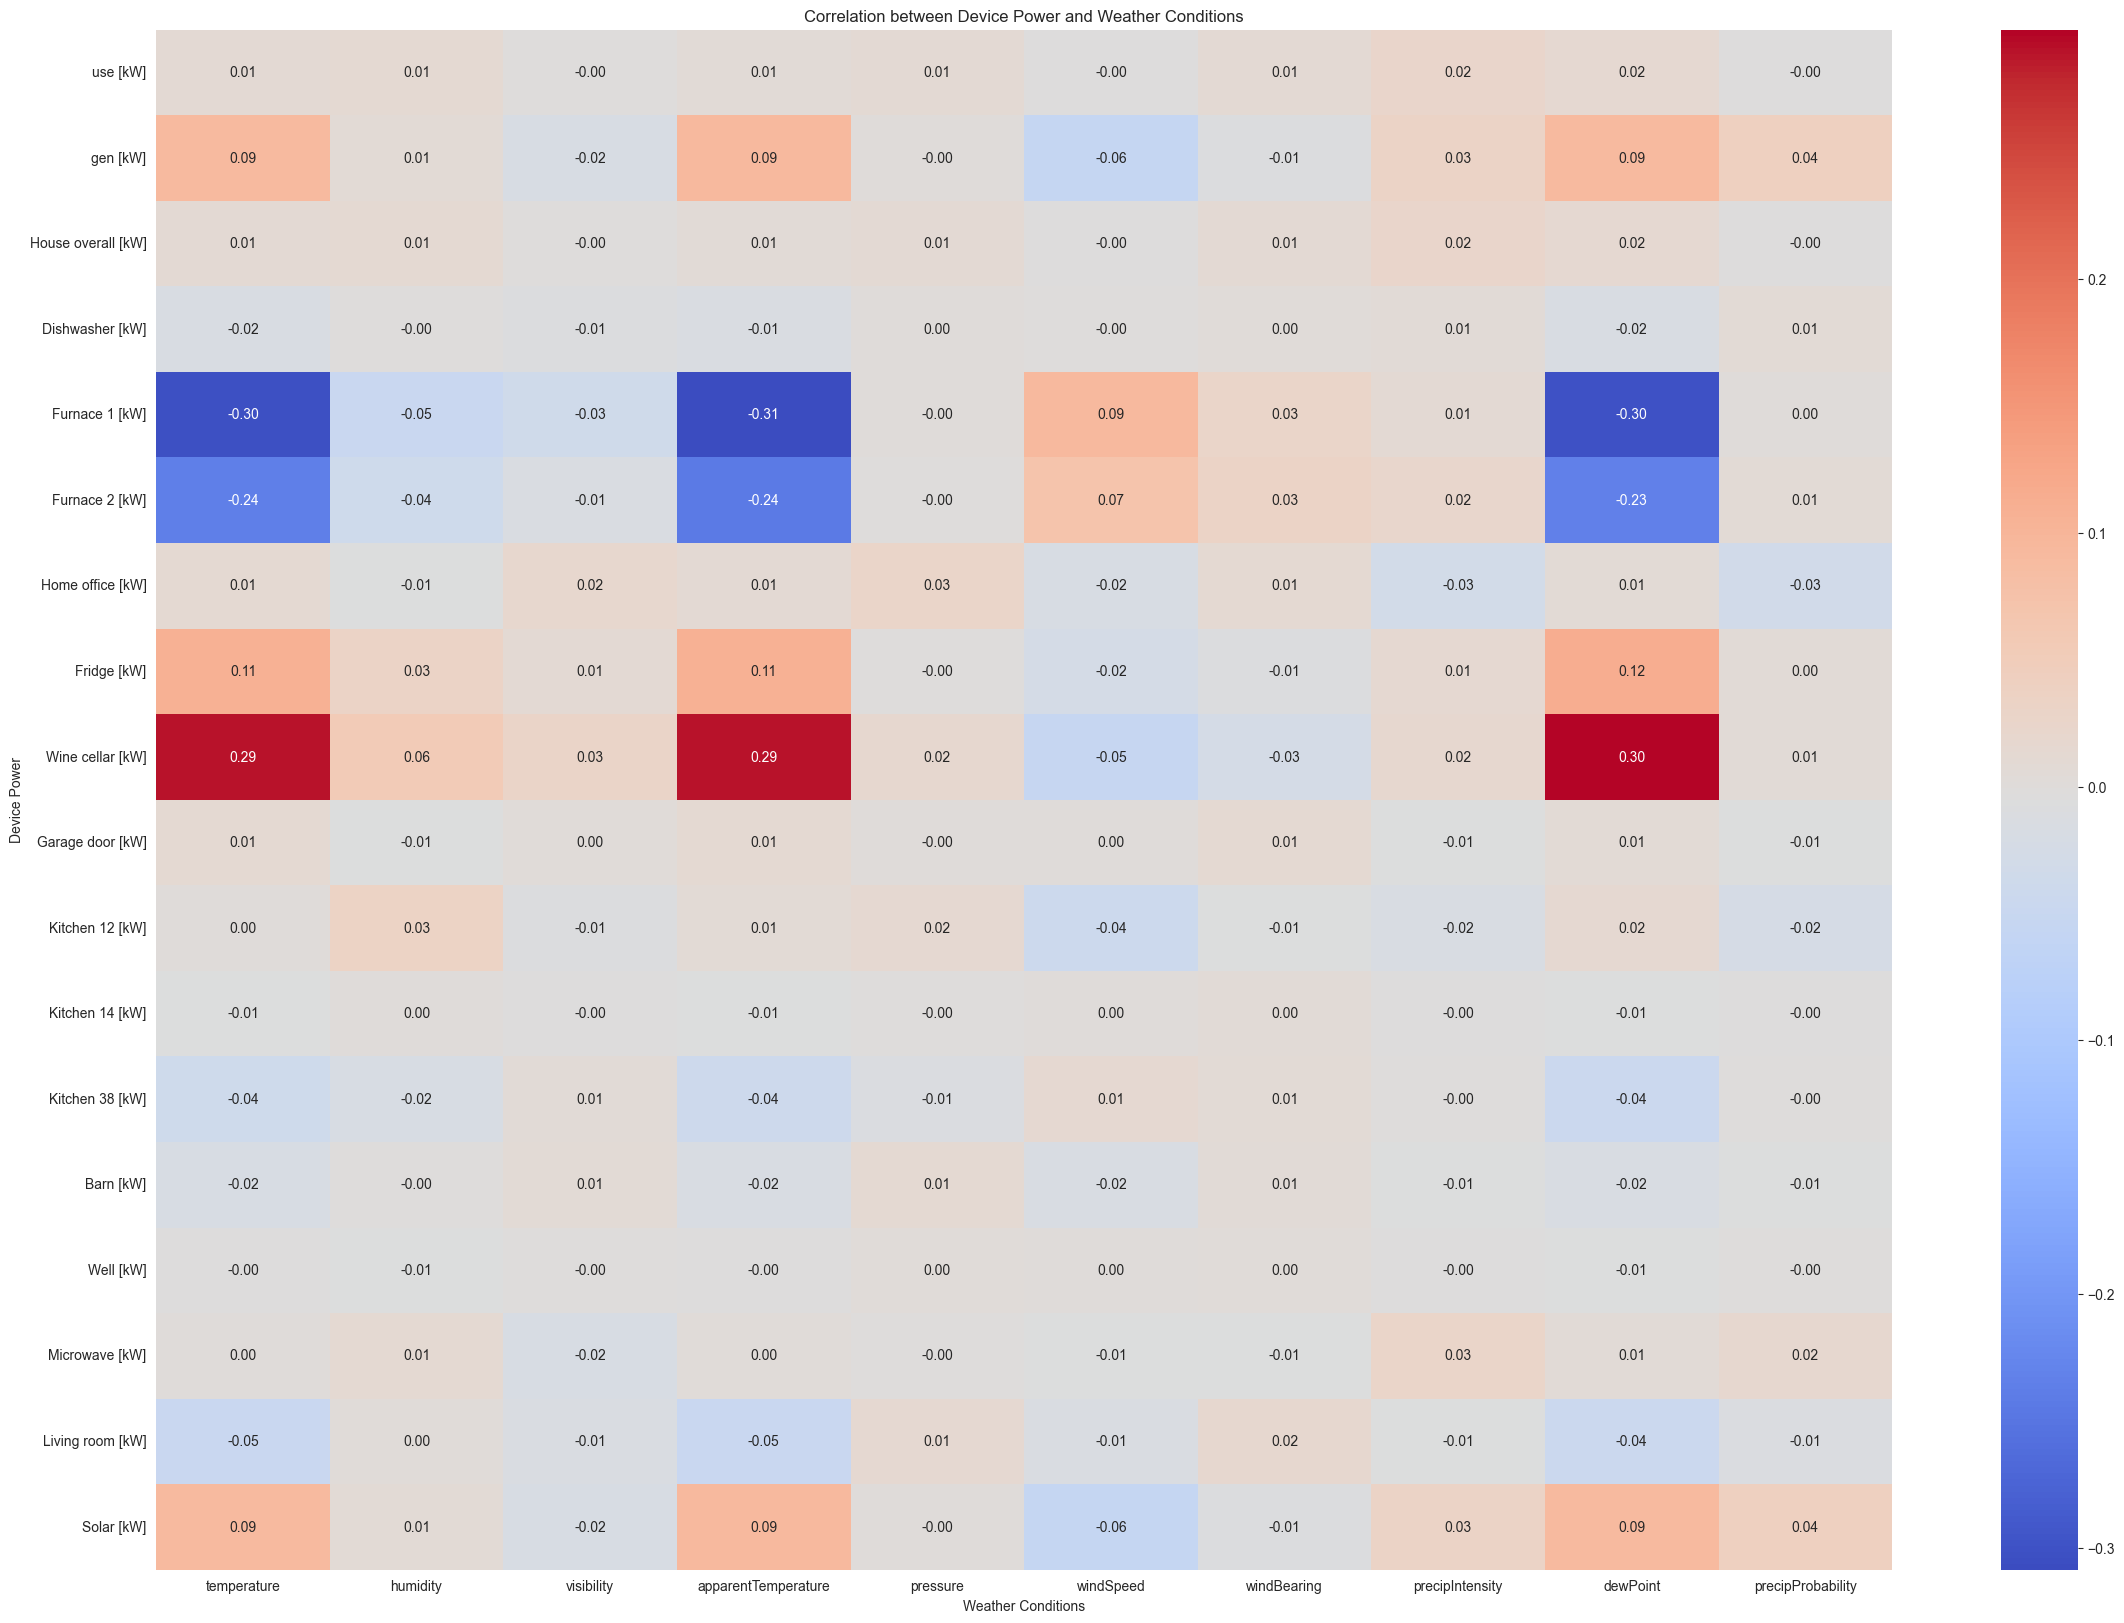

In [7]:
power_features = [
    'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]', 'Furnace 1 [kW]',
    'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]', 
    'Garage door [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]',
    'Barn [kW]', 'Well [kW]', 'Microwave [kW]', 'Living room [kW]', 'Solar [kW]'
]

weather_features = [
    'temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure',
    'windSpeed', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'
]

selected_data = data[power_features + weather_features]

correlation_matrix = selected_data.corr()
correlation_subset = correlation_matrix.loc[power_features, weather_features]


plt.figure(figsize=(28, 20))
sns.heatmap(
    correlation_subset, 
    annot=True,
    fmt = ".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title('Correlation between Device Power and Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Device Power')
plt.show()

In [8]:
hourly_data = selected_data.resample('h').mean()
daily_data = selected_data.resample('D').mean()

In [9]:
hourly_correlation_matrix = hourly_data.corr()
daily_correlation_matrix = daily_data.corr()

In [10]:
hourly_correlation_subset = hourly_correlation_matrix.loc[power_features, weather_features]
daily_correlation_subset = daily_correlation_matrix.loc[power_features, weather_features]

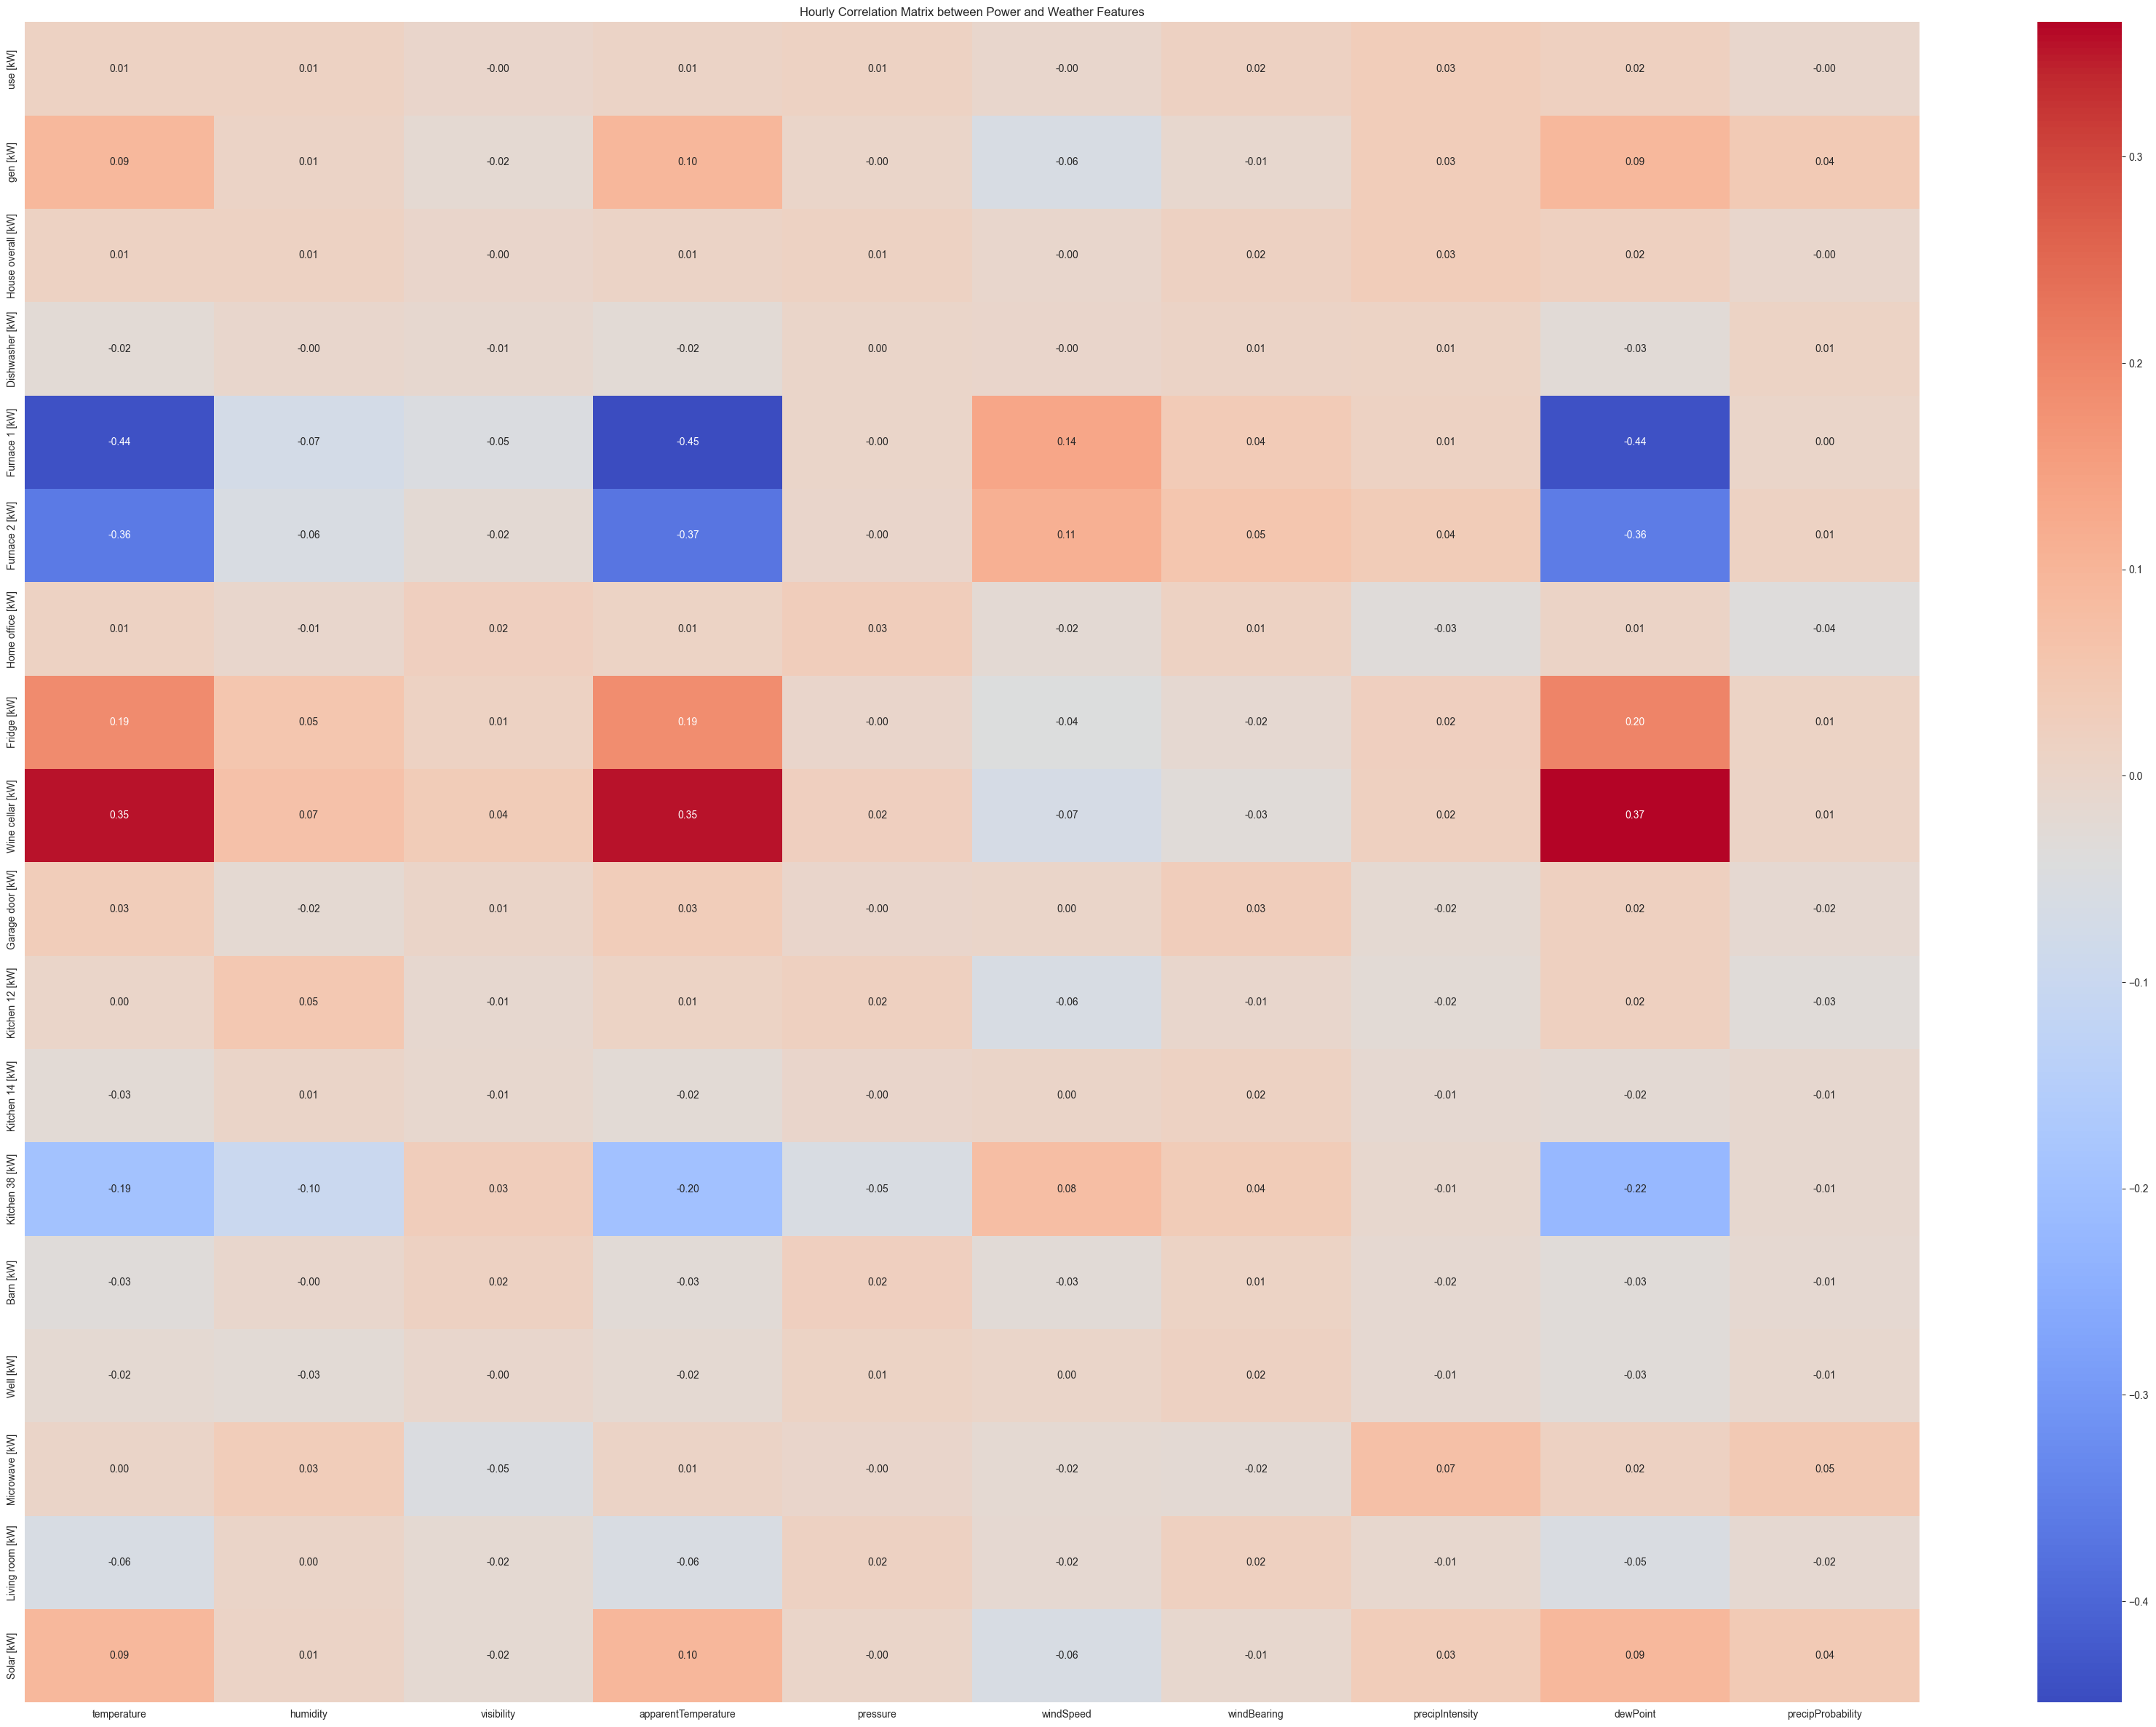

In [11]:
plt.figure(figsize=(42, 30))
sns.heatmap(
    hourly_correlation_subset, 
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title('Hourly Correlation Matrix between Power and Weather Features')
plt.show()

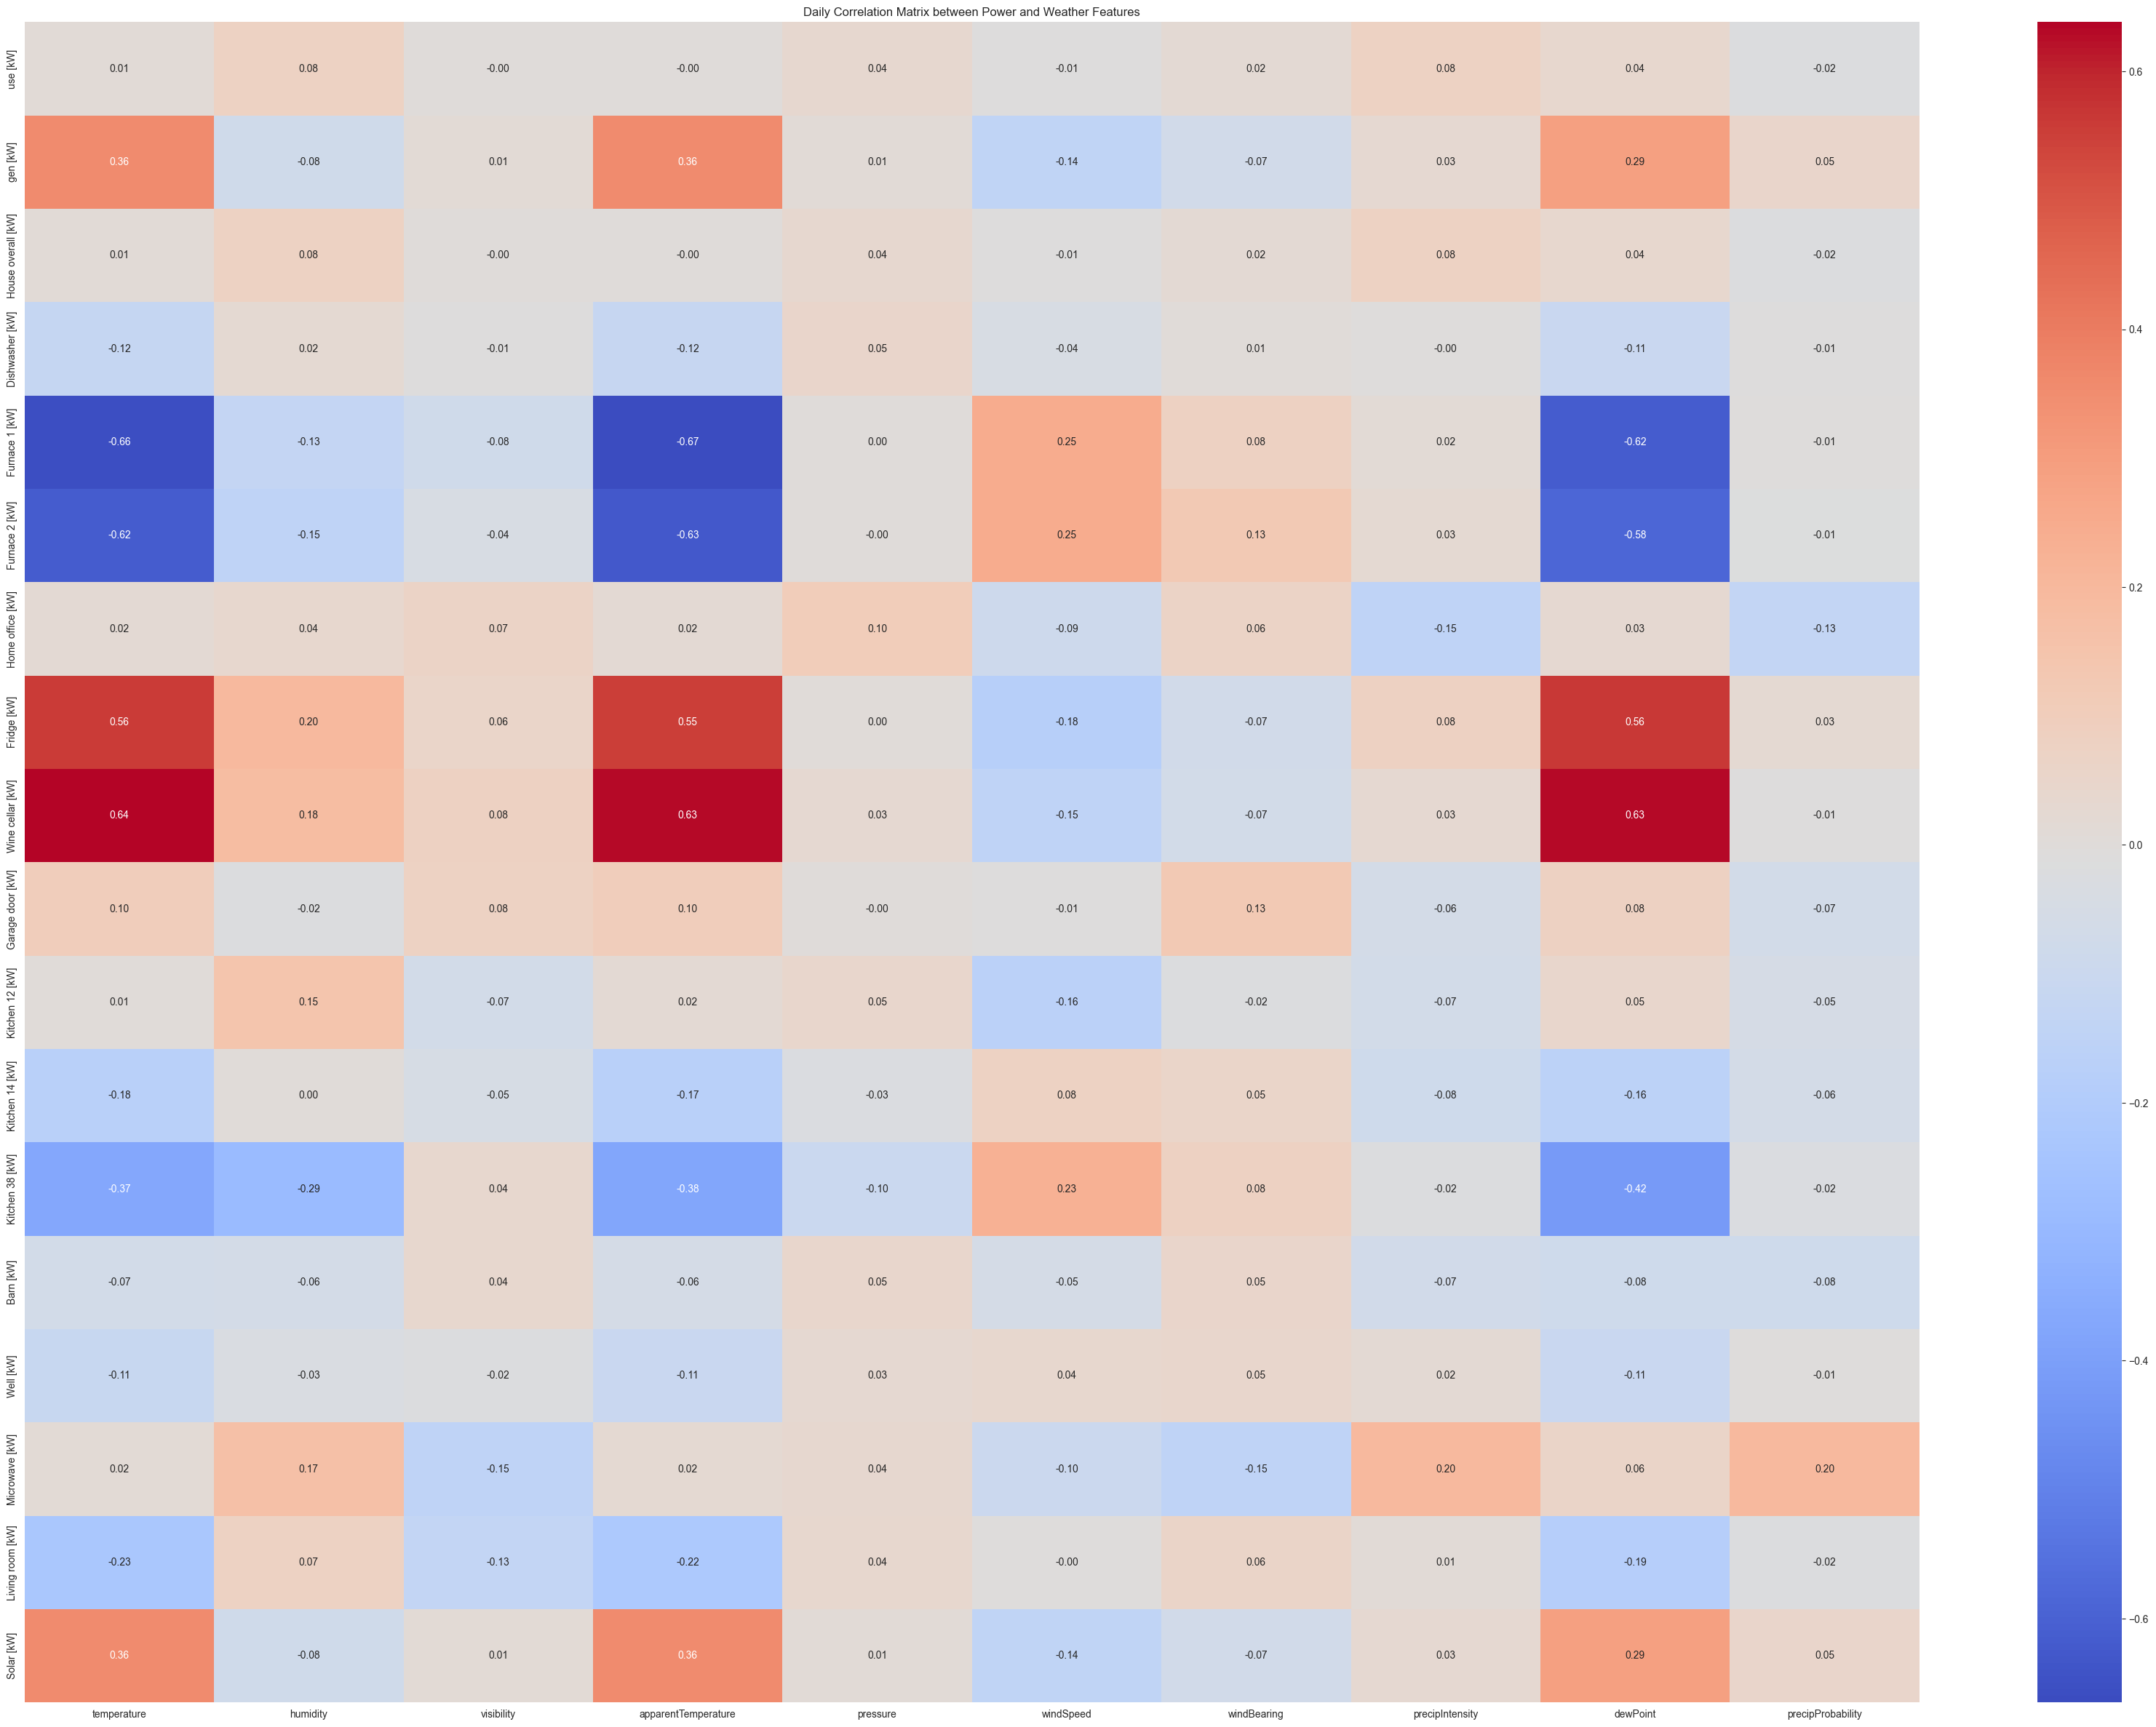

In [12]:
plt.figure(figsize=(42, 30))
sns.heatmap(
    daily_correlation_subset, 
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title('Daily Correlation Matrix between Power and Weather Features')
plt.show()

In [13]:
# plt.figure(figsize=(42, 30))
# plt.plot(data.index, data['Furnace 1 [kW]'], label='Furnace 1 Power (kW)', color='tab:blue')
# plt.xlabel('Time')
# plt.ylabel('Power (kW)')
# plt.title('Furnace 1 Power Consumption Over Time (Using New Time Index)')
# plt.legend()
# plt.grid(visible=True, linestyle='--', alpha=0.5)
# plt.show()

Based on the correlation matrix，there‘re some devices that have strong correlation with weather information：

In [14]:
#pick up items what correlation is over 0.3 

high_corr_pairs = []

for power_feature in power_features:
    for weather_feature in weather_features:
        if abs(correlation_matrix.loc[power_feature, weather_feature]) > 0.3:
            high_corr_pairs.append((power_feature, weather_feature))
            
high_corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=['Power Feature', 'Weather Feature'])
print("Features with correlation > 0.3:")
print(high_corr_pairs_df)

Features with correlation > 0.3:
    Power Feature      Weather Feature
0  Furnace 1 [kW]          temperature
1  Furnace 1 [kW]  apparentTemperature
2  Furnace 1 [kW]             dewPoint


In [15]:
high_corr_pairs_hourly = []

for power_feature in power_features:
    for weather_feature in weather_features:
        if abs(hourly_correlation_matrix.loc[power_feature, weather_feature]) > 0.3:
            high_corr_pairs_hourly.append((power_feature, weather_feature))

high_corr_pairs_hourly_df = pd.DataFrame(high_corr_pairs_hourly, columns=['Power Feature', 'Weather Feature'])
print("Features with correlation > 0.3:")
print(high_corr_pairs_hourly_df)

Features with correlation > 0.3:
      Power Feature      Weather Feature
0    Furnace 1 [kW]          temperature
1    Furnace 1 [kW]  apparentTemperature
2    Furnace 1 [kW]             dewPoint
3    Furnace 2 [kW]          temperature
4    Furnace 2 [kW]  apparentTemperature
5    Furnace 2 [kW]             dewPoint
6  Wine cellar [kW]          temperature
7  Wine cellar [kW]  apparentTemperature
8  Wine cellar [kW]             dewPoint


In [16]:
high_corr_pairs_daily = []

for power_feature in power_features:
    for weather_feature in weather_features:
        if abs(daily_correlation_matrix.loc[power_feature, weather_feature]) > 0.3:
            high_corr_pairs_daily.append((power_feature, weather_feature))

high_corr_pairs_daily_df = pd.DataFrame(high_corr_pairs_daily, columns=['Power Feature', 'Weather Feature'])
print("Features with correlation > 0.3:")
print(high_corr_pairs_daily_df)

Features with correlation > 0.3:
       Power Feature      Weather Feature
0           gen [kW]          temperature
1           gen [kW]  apparentTemperature
2     Furnace 1 [kW]          temperature
3     Furnace 1 [kW]  apparentTemperature
4     Furnace 1 [kW]             dewPoint
5     Furnace 2 [kW]          temperature
6     Furnace 2 [kW]  apparentTemperature
7     Furnace 2 [kW]             dewPoint
8        Fridge [kW]          temperature
9        Fridge [kW]  apparentTemperature
10       Fridge [kW]             dewPoint
11  Wine cellar [kW]          temperature
12  Wine cellar [kW]  apparentTemperature
13  Wine cellar [kW]             dewPoint
14   Kitchen 38 [kW]          temperature
15   Kitchen 38 [kW]  apparentTemperature
16   Kitchen 38 [kW]             dewPoint
17        Solar [kW]          temperature
18        Solar [kW]  apparentTemperature


So based on daily_correlation_matrix， those data items with high correlation with weather information are :
Gen[kw](Total energy generated by means of solar or other power generation resources),
Furnance 1[kw](energy consumed by  furnance No.1),
Furnance 2[kw](energy consumed by  furnance No.2),
Fridge[kw](energy consumed by fridge ),
Wine cellar[kw](energy consumed by  wine cellar),
kitchen 38[kw](energy consumption in kitchen 3),
solar[kw](Solar power generation)

Connected Weather information are:
temperature(temperature),
apparentTemperature(temperature),
dewPoint(dew point),

Tack daily data as base analytic data

In [17]:
power_features_of_interest = [
    'gen [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 
    'Fridge [kW]', 'Wine cellar [kW]', 'Kitchen 38 [kW]', 'Solar [kW]'
]

In [18]:
independent_statistics = data[power_features_of_interest].agg(['mean', 'std', 'min', 'max']).T
independent_statistics.columns = ['Mean (kW)', 'Std (kW)', 'Min (kW)', 'Max (kW)']

In [19]:
print("Feature Statistics:\n", independent_statistics)

Feature Statistics:
                   Mean (kW)  Std (kW)  Min (kW)  Max (kW)
gen [kW]           0.076229  0.128428  0.000000  0.613883
Furnace 1 [kW]     0.099210  0.169059  0.000017  1.934083
Furnace 2 [kW]     0.136779  0.178631  0.000067  0.794933
Fridge [kW]        0.063556  0.076199  0.000067  0.851267
Wine cellar [kW]   0.042137  0.057967  0.000017  1.273933
Kitchen 38 [kW]    0.000009  0.000010  0.000000  0.000183
Solar [kW]         0.076229  0.128428  0.000000  0.613883


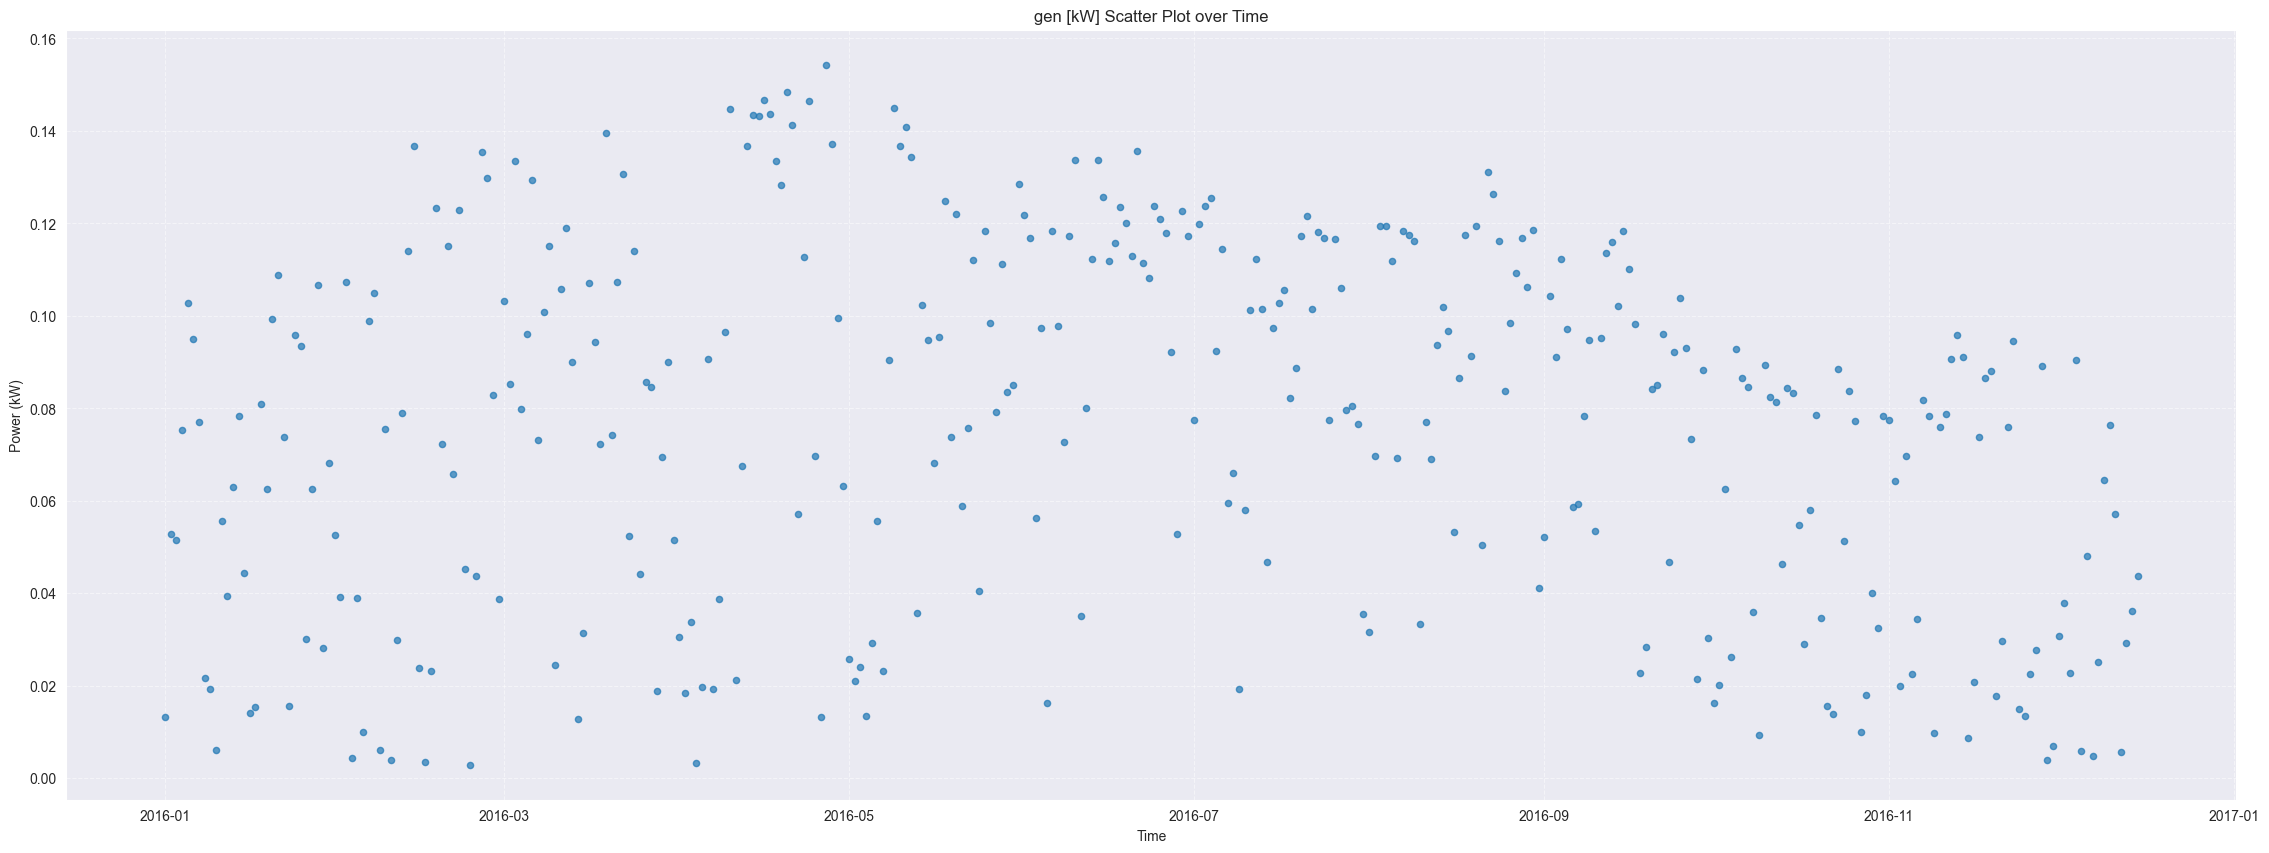

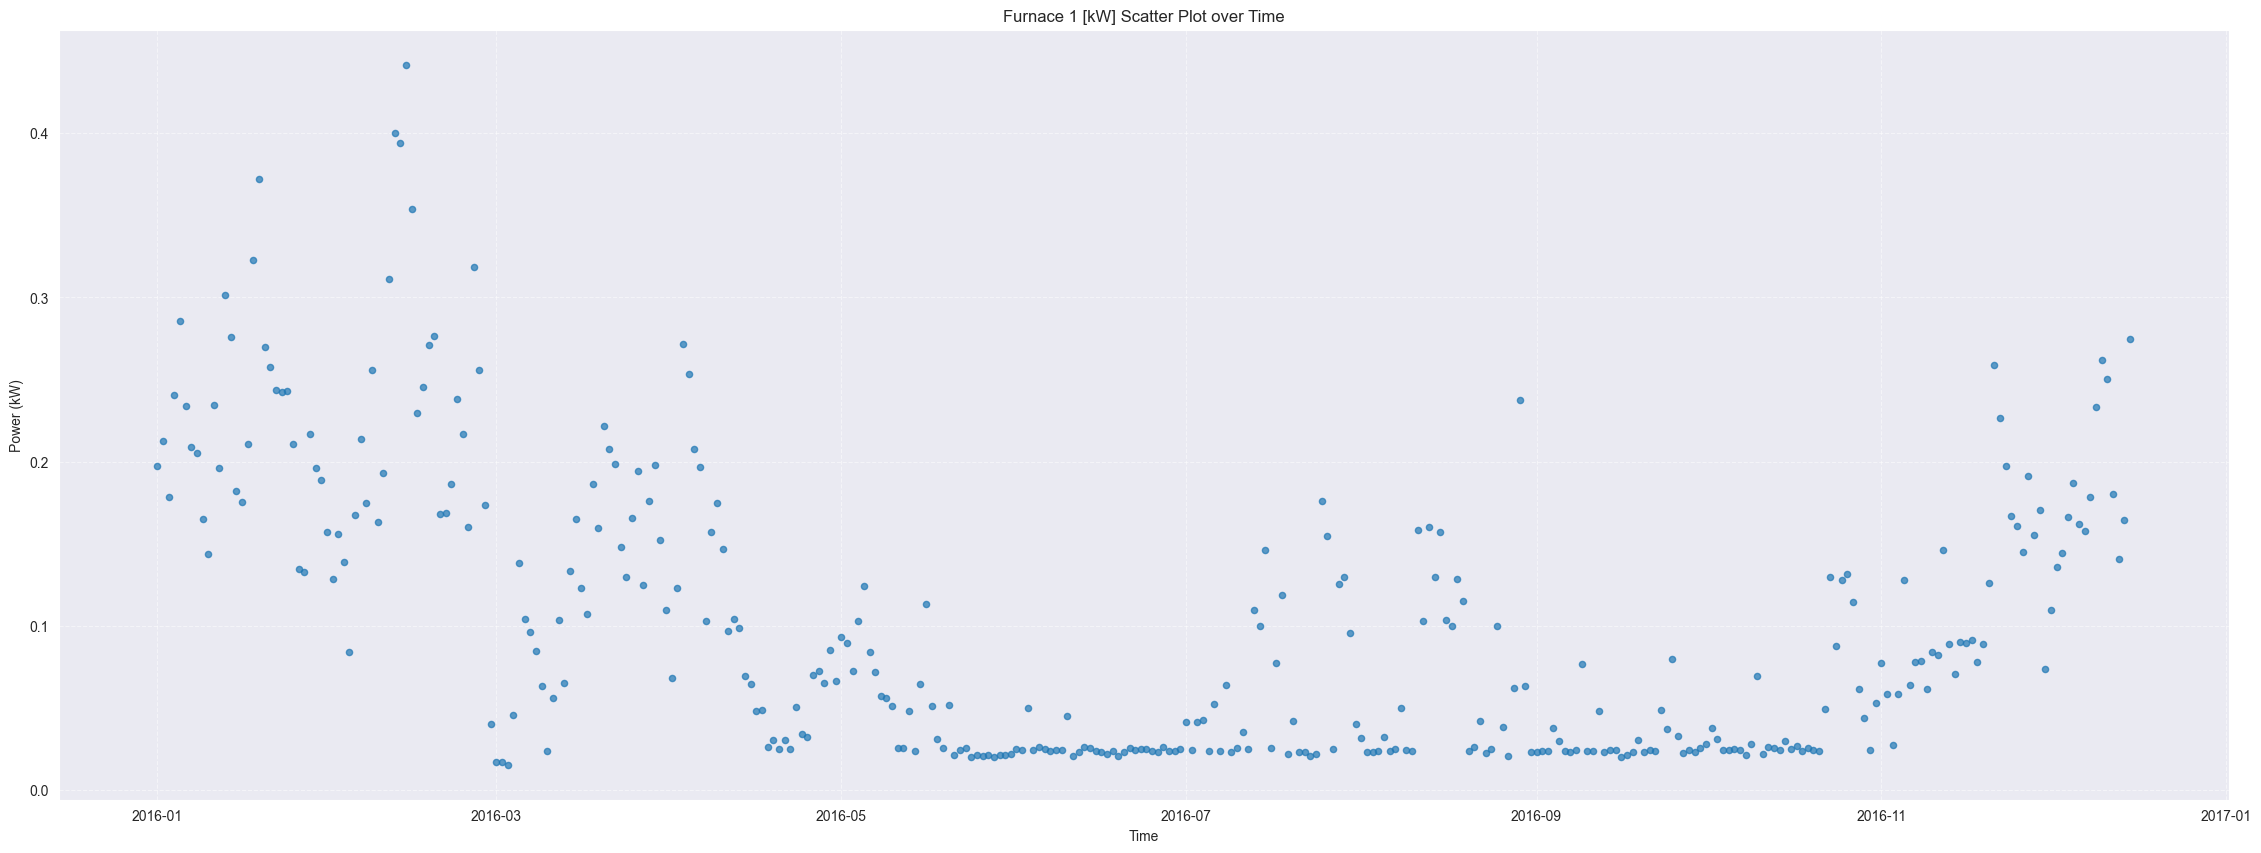

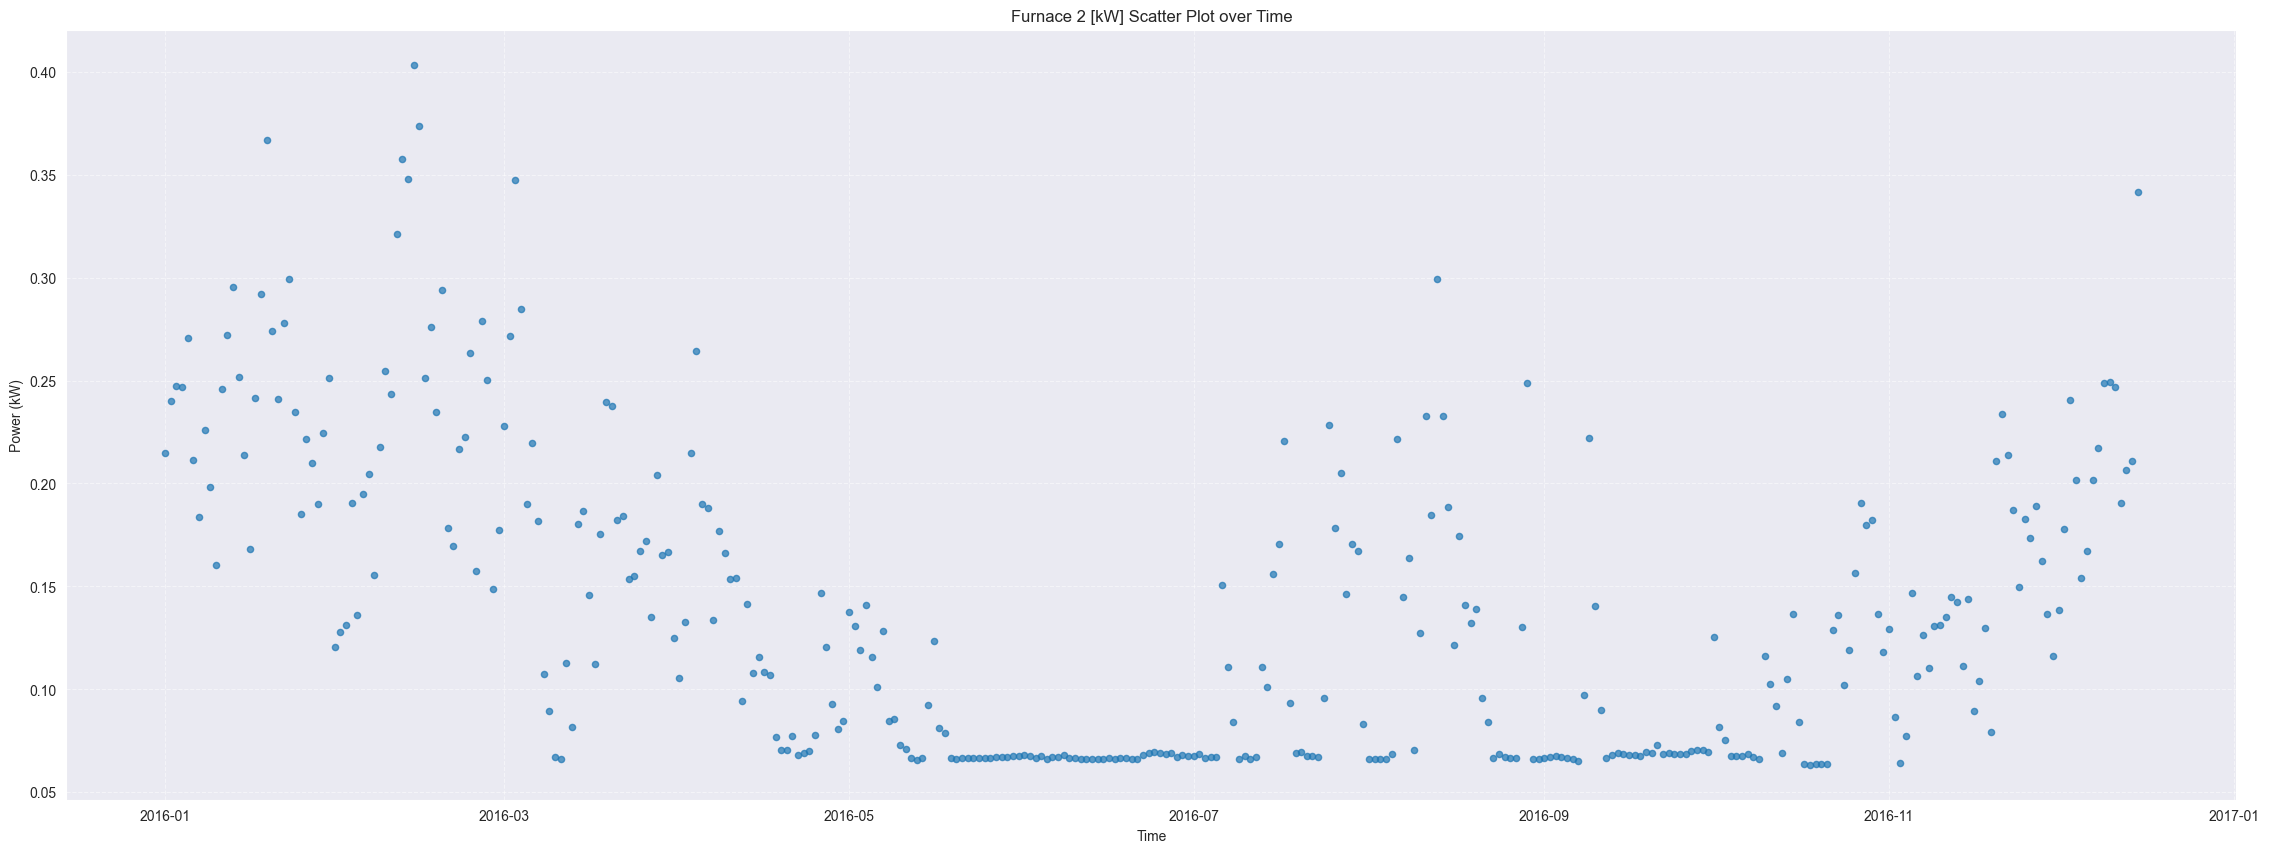

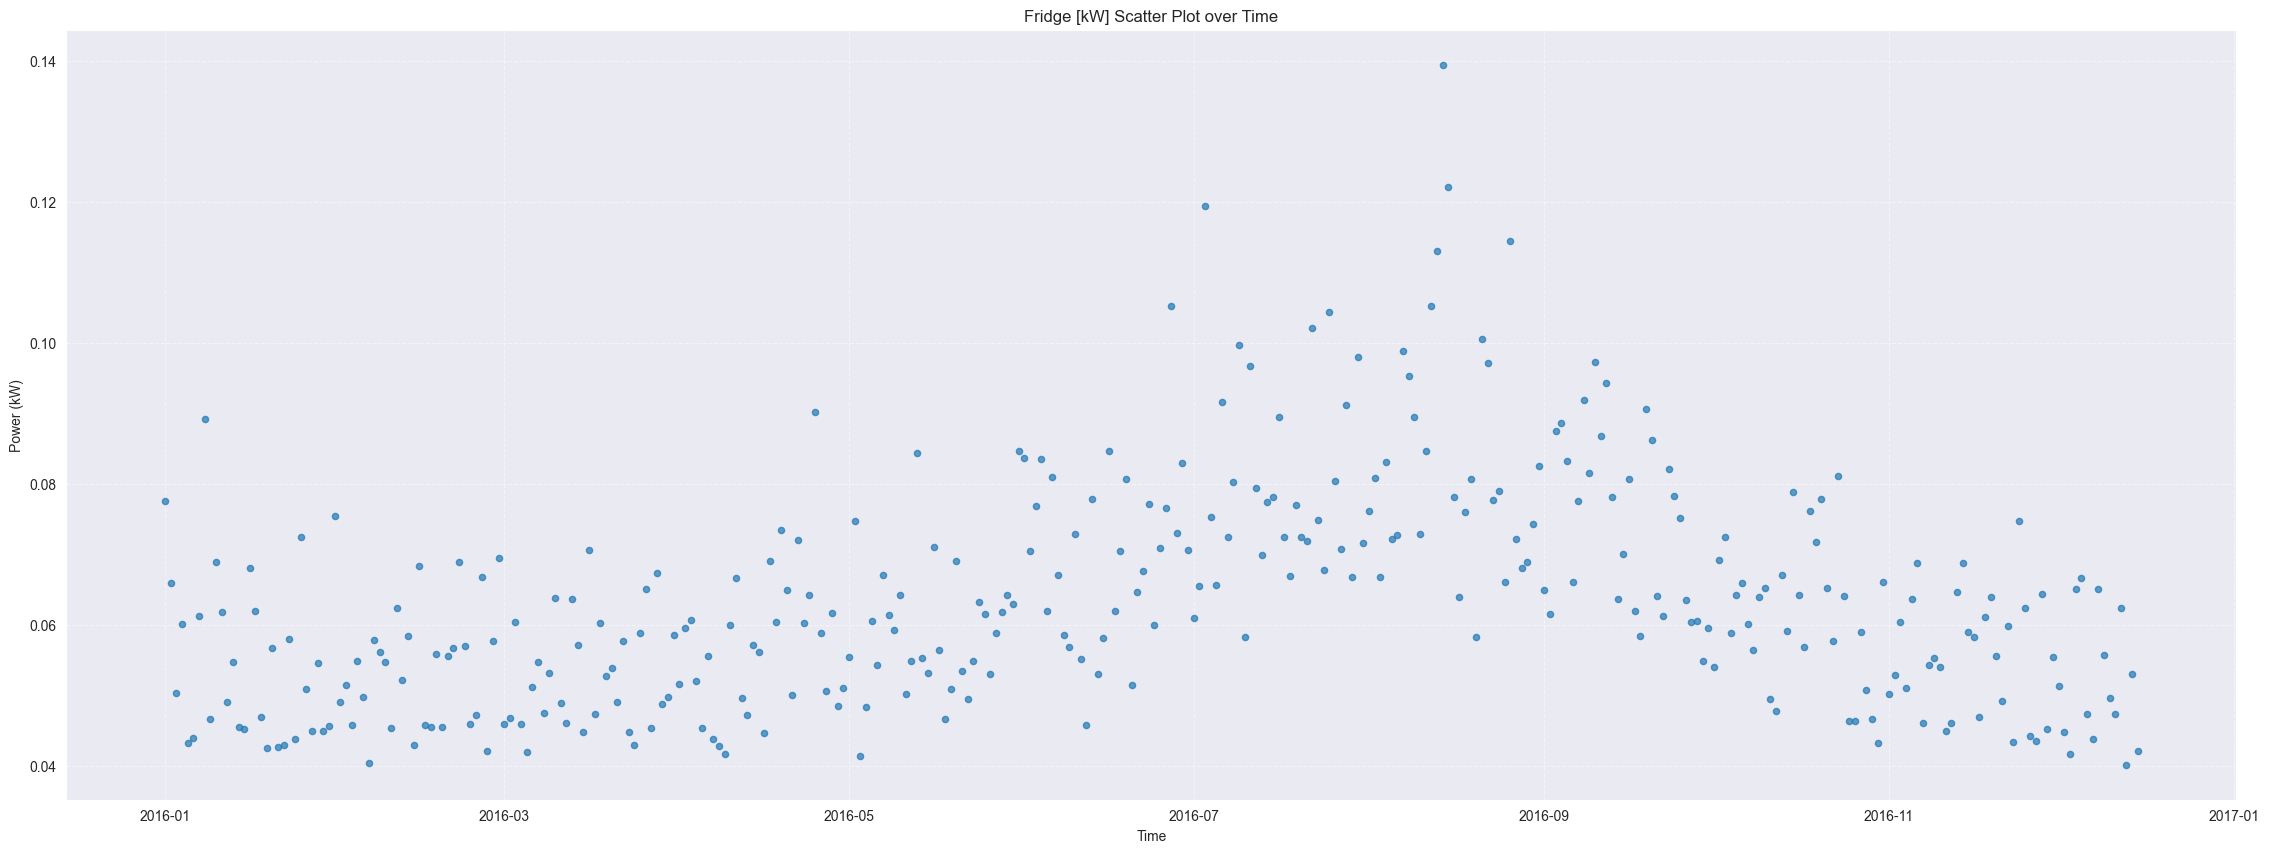

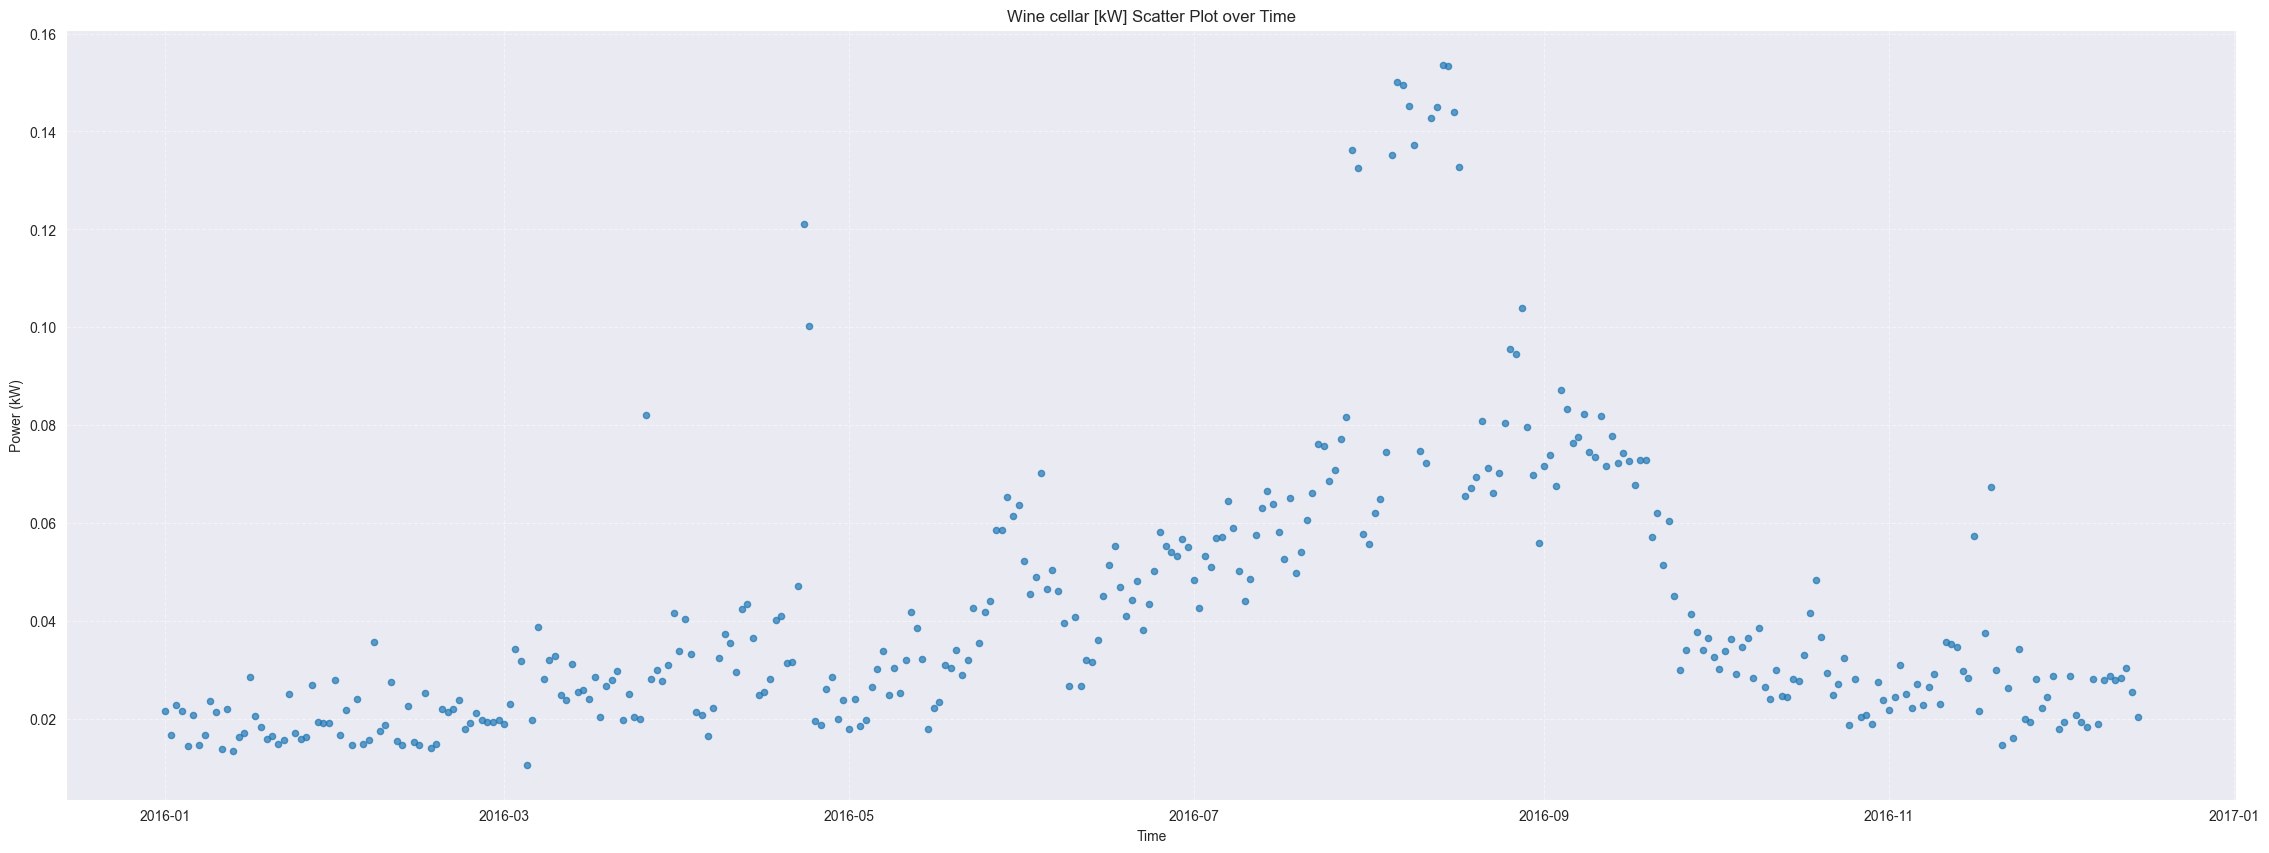

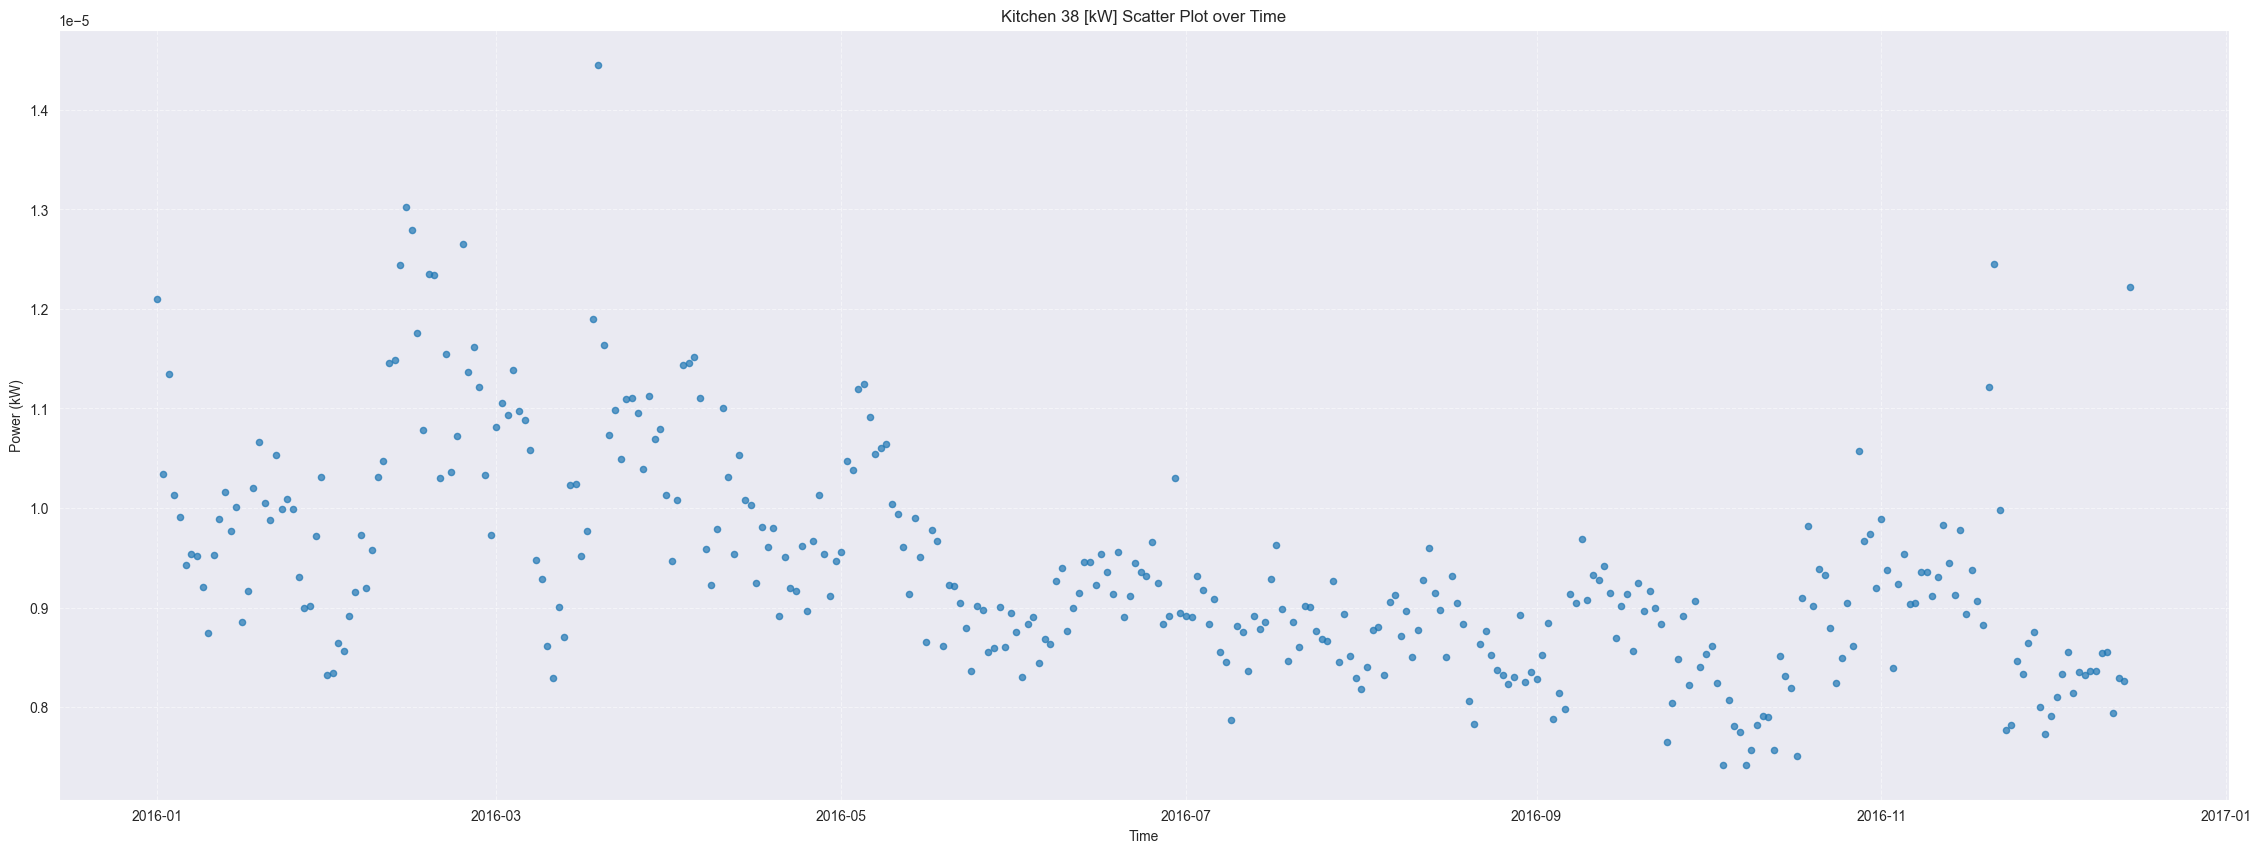

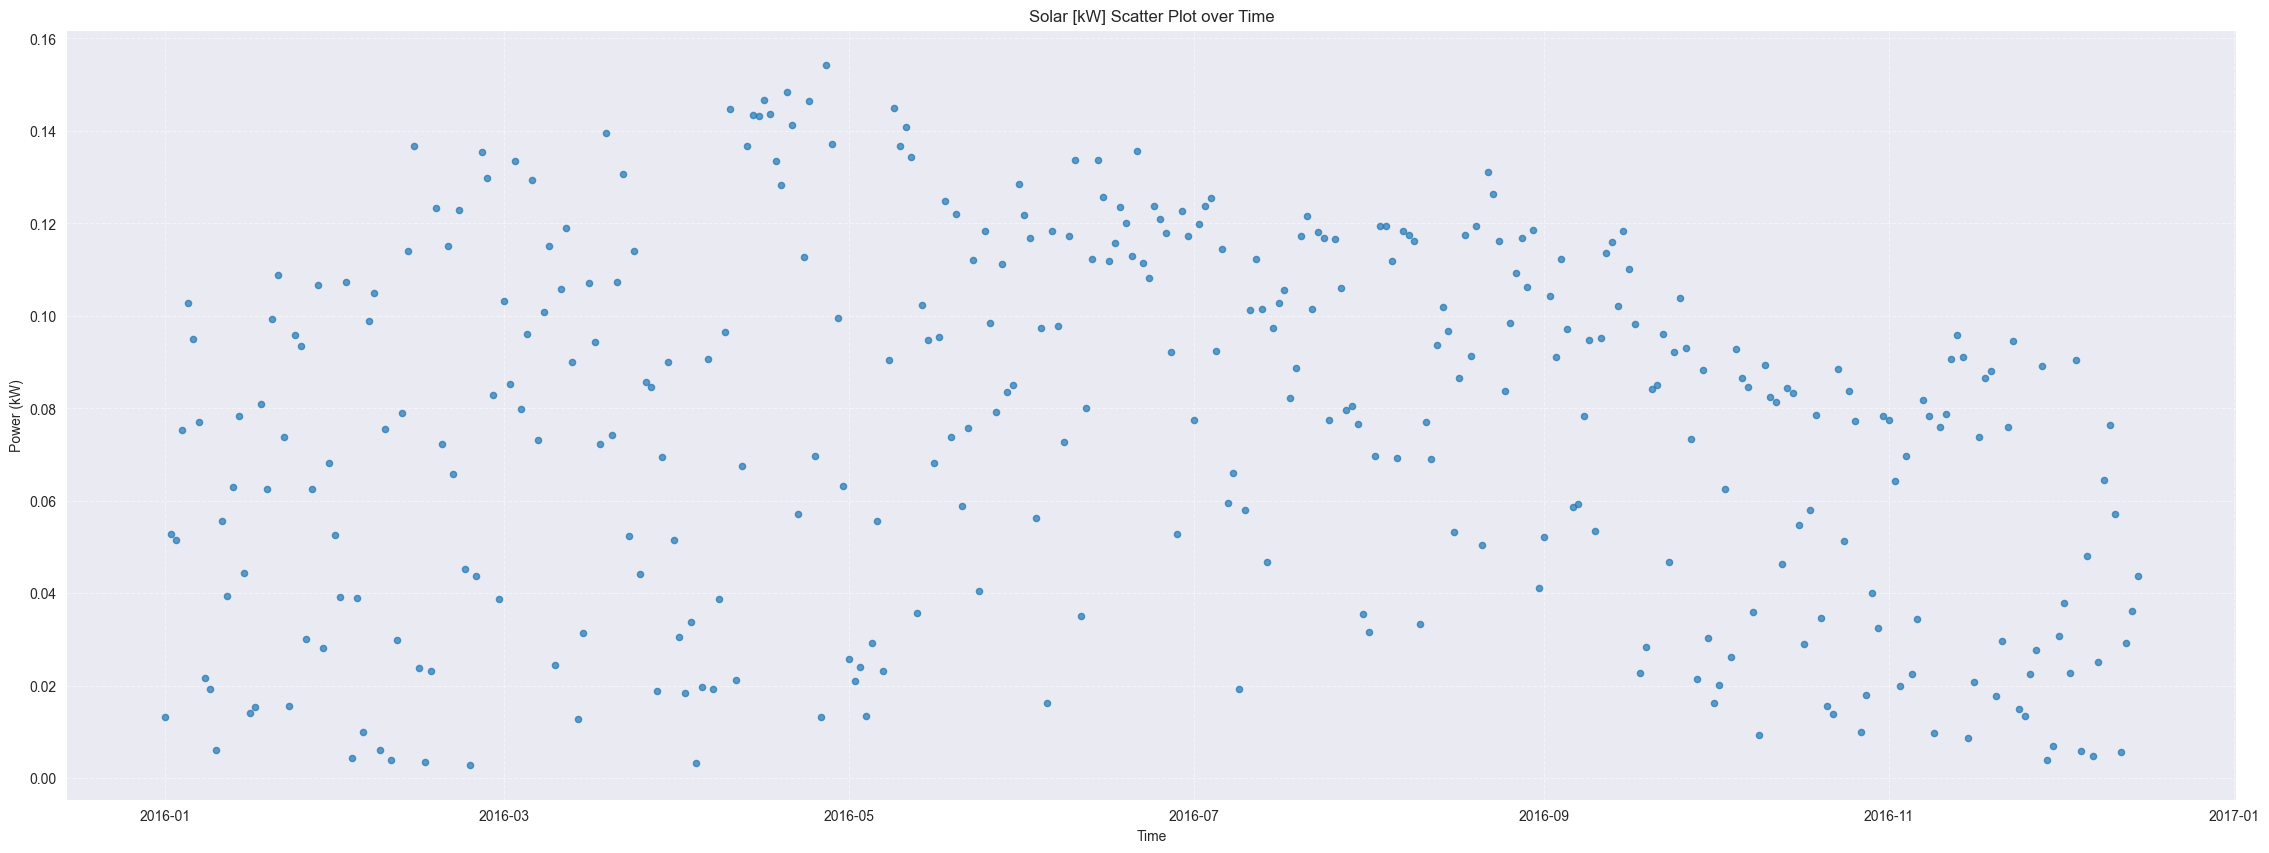

In [20]:
for feature in power_features_of_interest:
    plt.figure(figsize=(28, 10))
    plt.scatter(daily_data.index, daily_data[feature], s=20, alpha=0.7)
    plt.title(f'{feature} Scatter Plot over Time')
    plt.xlabel('Time')
    plt.ylabel('Power (kW)')
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.show()

In [21]:
# data['Month'] = new_time_index.month
# data['Day'] = new_time_index.day
# data['Weekday'] = new_time_index.weekday
# data['Hour'] = new_time_index.hour

Total Power Consuming 

In [22]:
data['Total Power [kW]'] = data[power_features_of_interest].sum(axis=1)

print(data['Total Power [kW]'])

new_time
2016-01-01 00:00:00    0.220717
2016-01-01 00:01:00    0.222450
2016-01-01 00:02:00    0.220483
2016-01-01 00:03:00    0.312500
2016-01-01 00:04:00    0.437550
                         ...   
2016-12-15 22:26:00    0.749217
2016-12-15 22:27:00    1.080000
2016-12-15 22:28:00    1.136050
2016-12-15 22:29:00    1.148367
2016-12-15 22:30:00    0.000000
Name: Total Power [kW], Length: 503911, dtype: float64


In [23]:
featured_correlation_matrix = data[power_features_of_interest].corr()
print(featured_correlation_matrix)

                  gen [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Fridge [kW]  \
gen [kW]          1.000000       -0.020461       -0.107684    -0.002862   
Furnace 1 [kW]   -0.020461        1.000000        0.240445    -0.042511   
Furnace 2 [kW]   -0.107684        0.240445        1.000000    -0.032574   
Fridge [kW]      -0.002862       -0.042511       -0.032574     1.000000   
Wine cellar [kW]  0.062430       -0.096036       -0.052272     0.076183   
Kitchen 38 [kW]   0.035688        0.048717        0.140033    -0.009586   
Solar [kW]        1.000000       -0.020461       -0.107684    -0.002862   

                  Wine cellar [kW]  Kitchen 38 [kW]  Solar [kW]  
gen [kW]                  0.062430         0.035688    1.000000  
Furnace 1 [kW]           -0.096036         0.048717   -0.020461  
Furnace 2 [kW]           -0.052272         0.140033   -0.107684  
Fridge [kW]               0.076183        -0.009586   -0.002862  
Wine cellar [kW]          1.000000        -0.012364    0.062430  
Kit

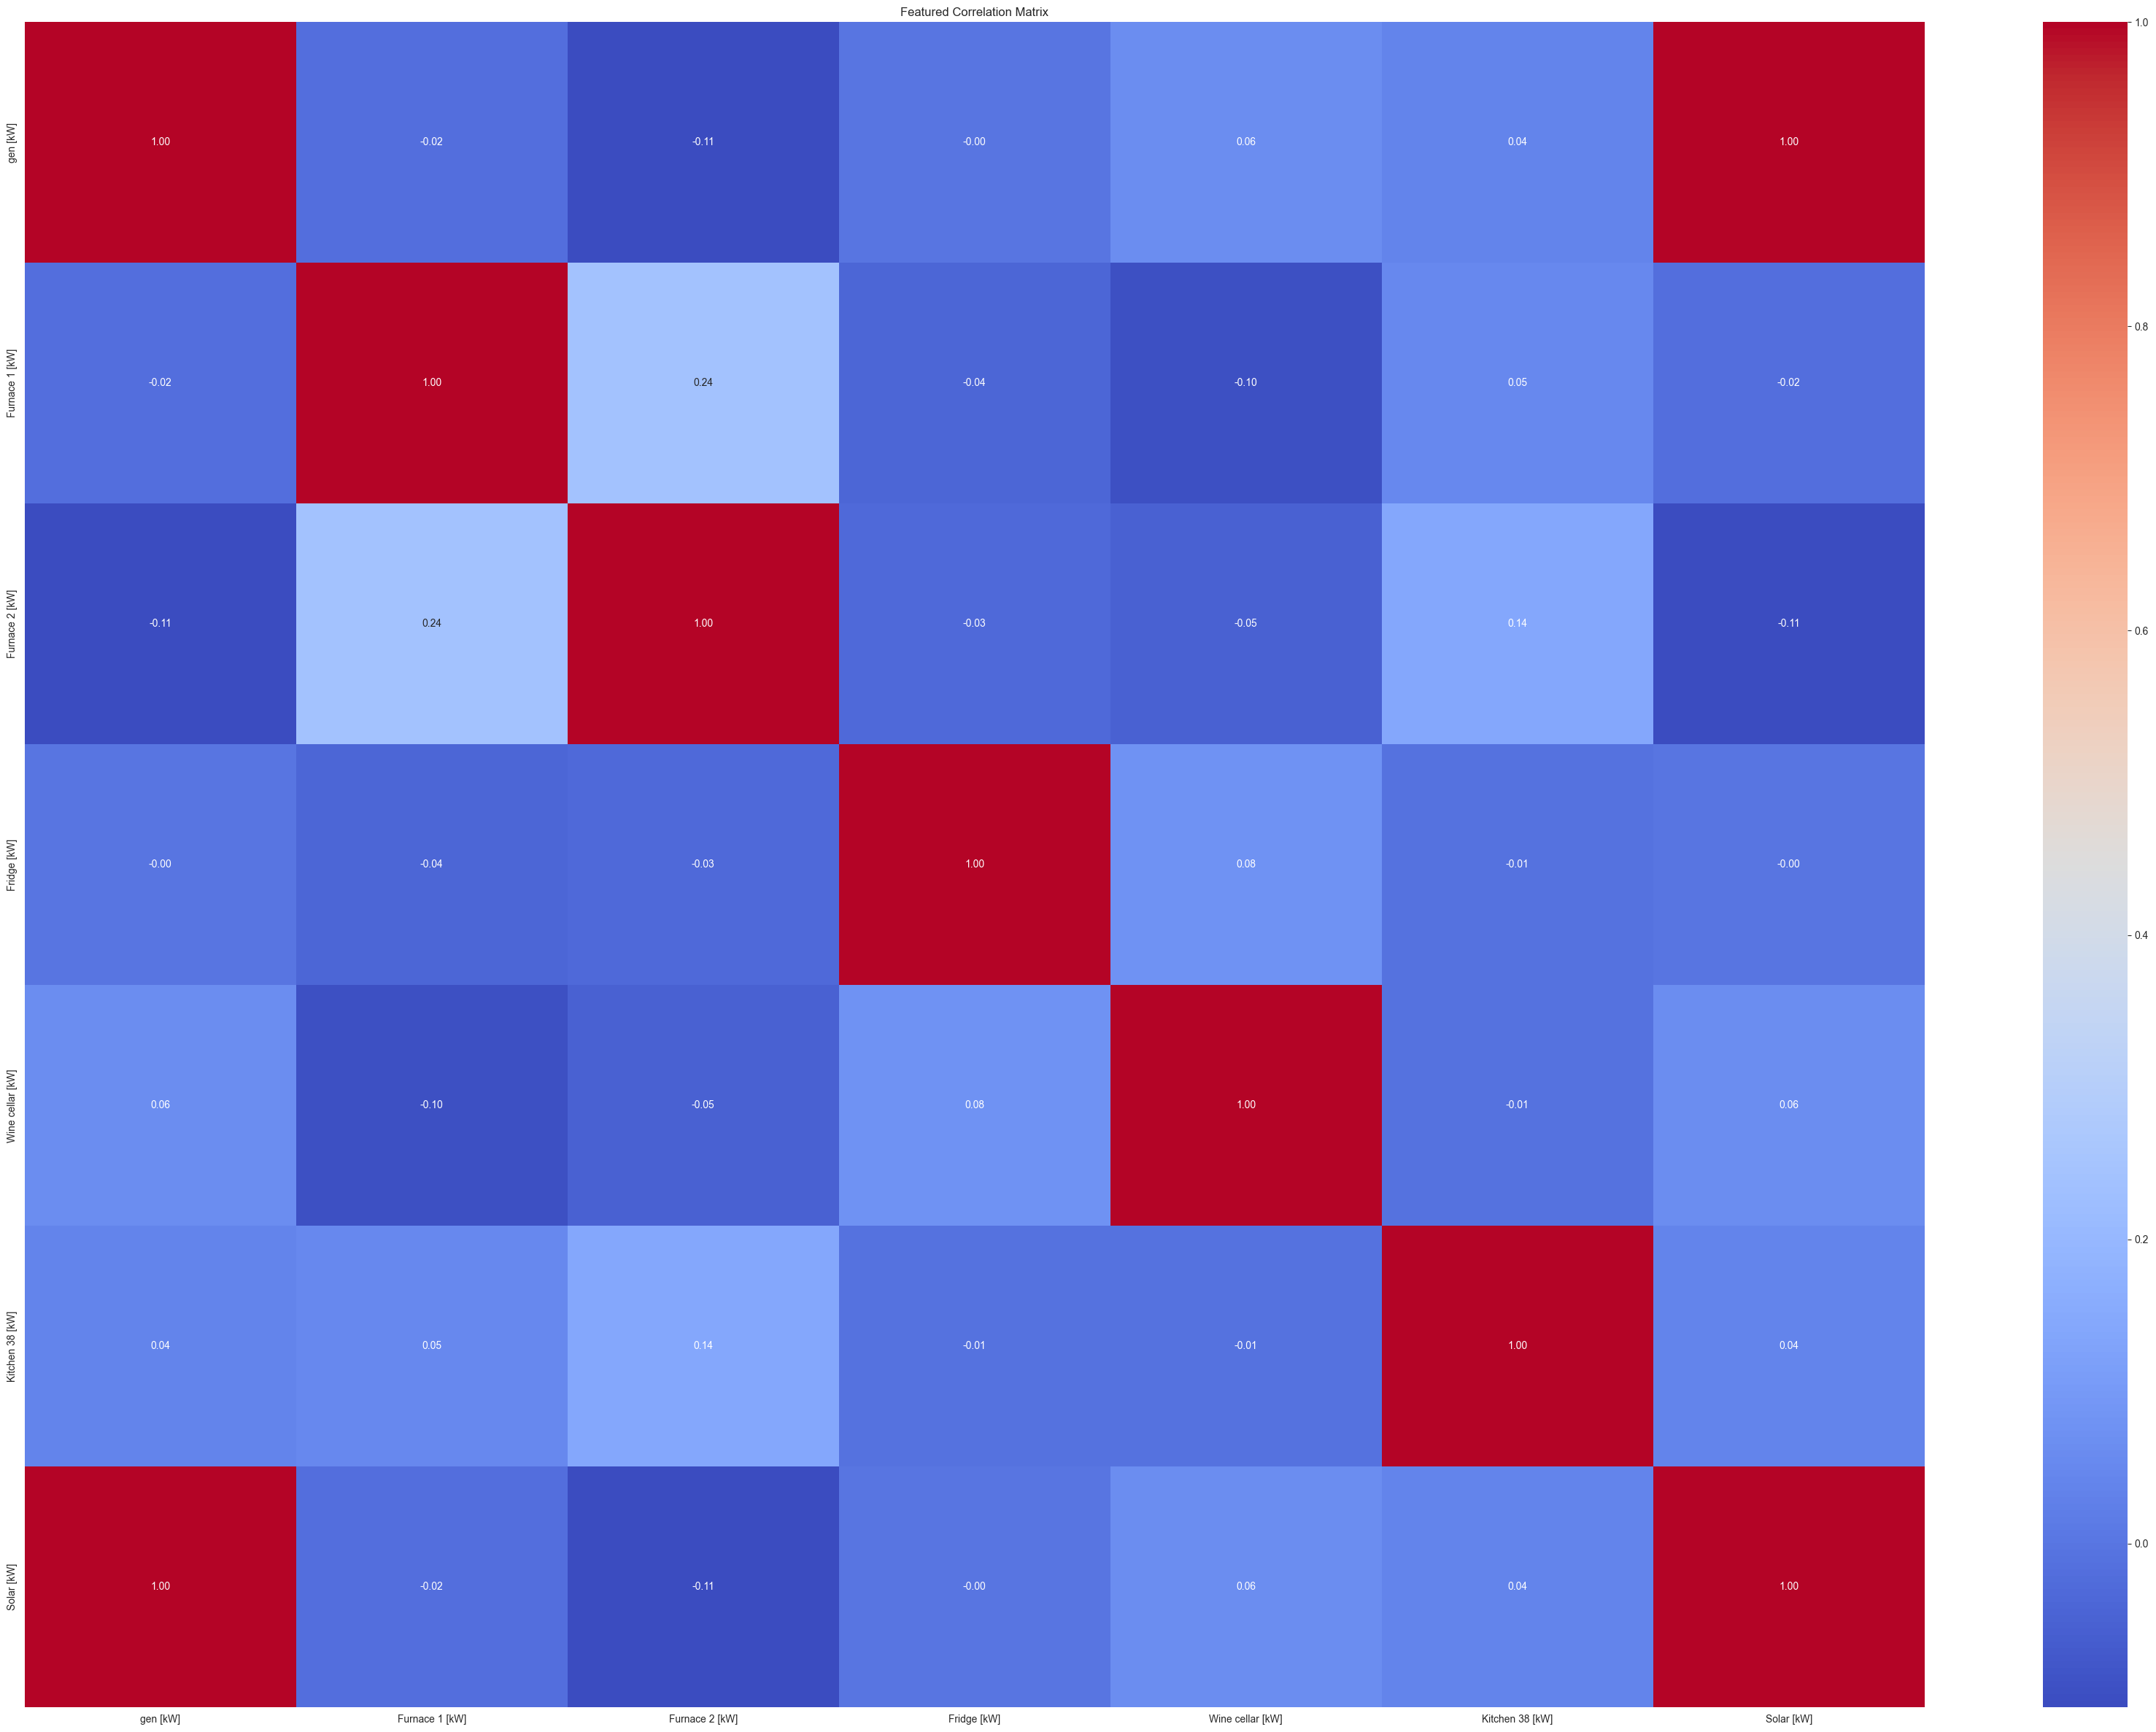

In [24]:
featured_correlation_subset = featured_correlation_matrix.loc[power_features_of_interest, power_features_of_interest]

plt.figure(figsize=(42, 30))
sns.heatmap(
    featured_correlation_subset, 
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title('Featured Correlation Matrix')
plt.show()

Maybe it's now better to do PCA since we have sselected feature and their correlation.But we need to conduct independent feature of each device. 

In [25]:
for feature in power_features_of_interest:
    data[f'{feature}_mean'] = data[feature].mean()
    data[f'{feature}_std'] = data[feature].std()
    data[f'{feature}_max'] = data[feature].max()
    data[f'{feature}_min'] = data[feature].min()

In [26]:
window_size = 24*60  # Rolling windows for 24 hour = 24*60 = 1440 minutes
for feature in power_features_of_interest:
    data[f'{feature}_rolling_mean'] = data[feature].rolling(window=window_size).mean()
    data[f'{feature}_rolling_std'] = data[feature].rolling(window=window_size).std()

Summary for weather condition:

In [27]:
unique_weather_types = data['summary'].unique()
print("Unique Weather Types:", unique_weather_types)

Unique Weather Types: ['Clear' 'Mostly Cloudy' 'Overcast' 'Partly Cloudy' 'Drizzle' 'Light Rain'
 'Rain' 'Light Snow' 'Flurries' 'Breezy' 'Snow' 'Rain and Breezy' 'Foggy'
 'Breezy and Mostly Cloudy' 'Breezy and Partly Cloudy'
 'Flurries and Breezy' 'Dry' 'Heavy Snow' nan]


Visualizaion:

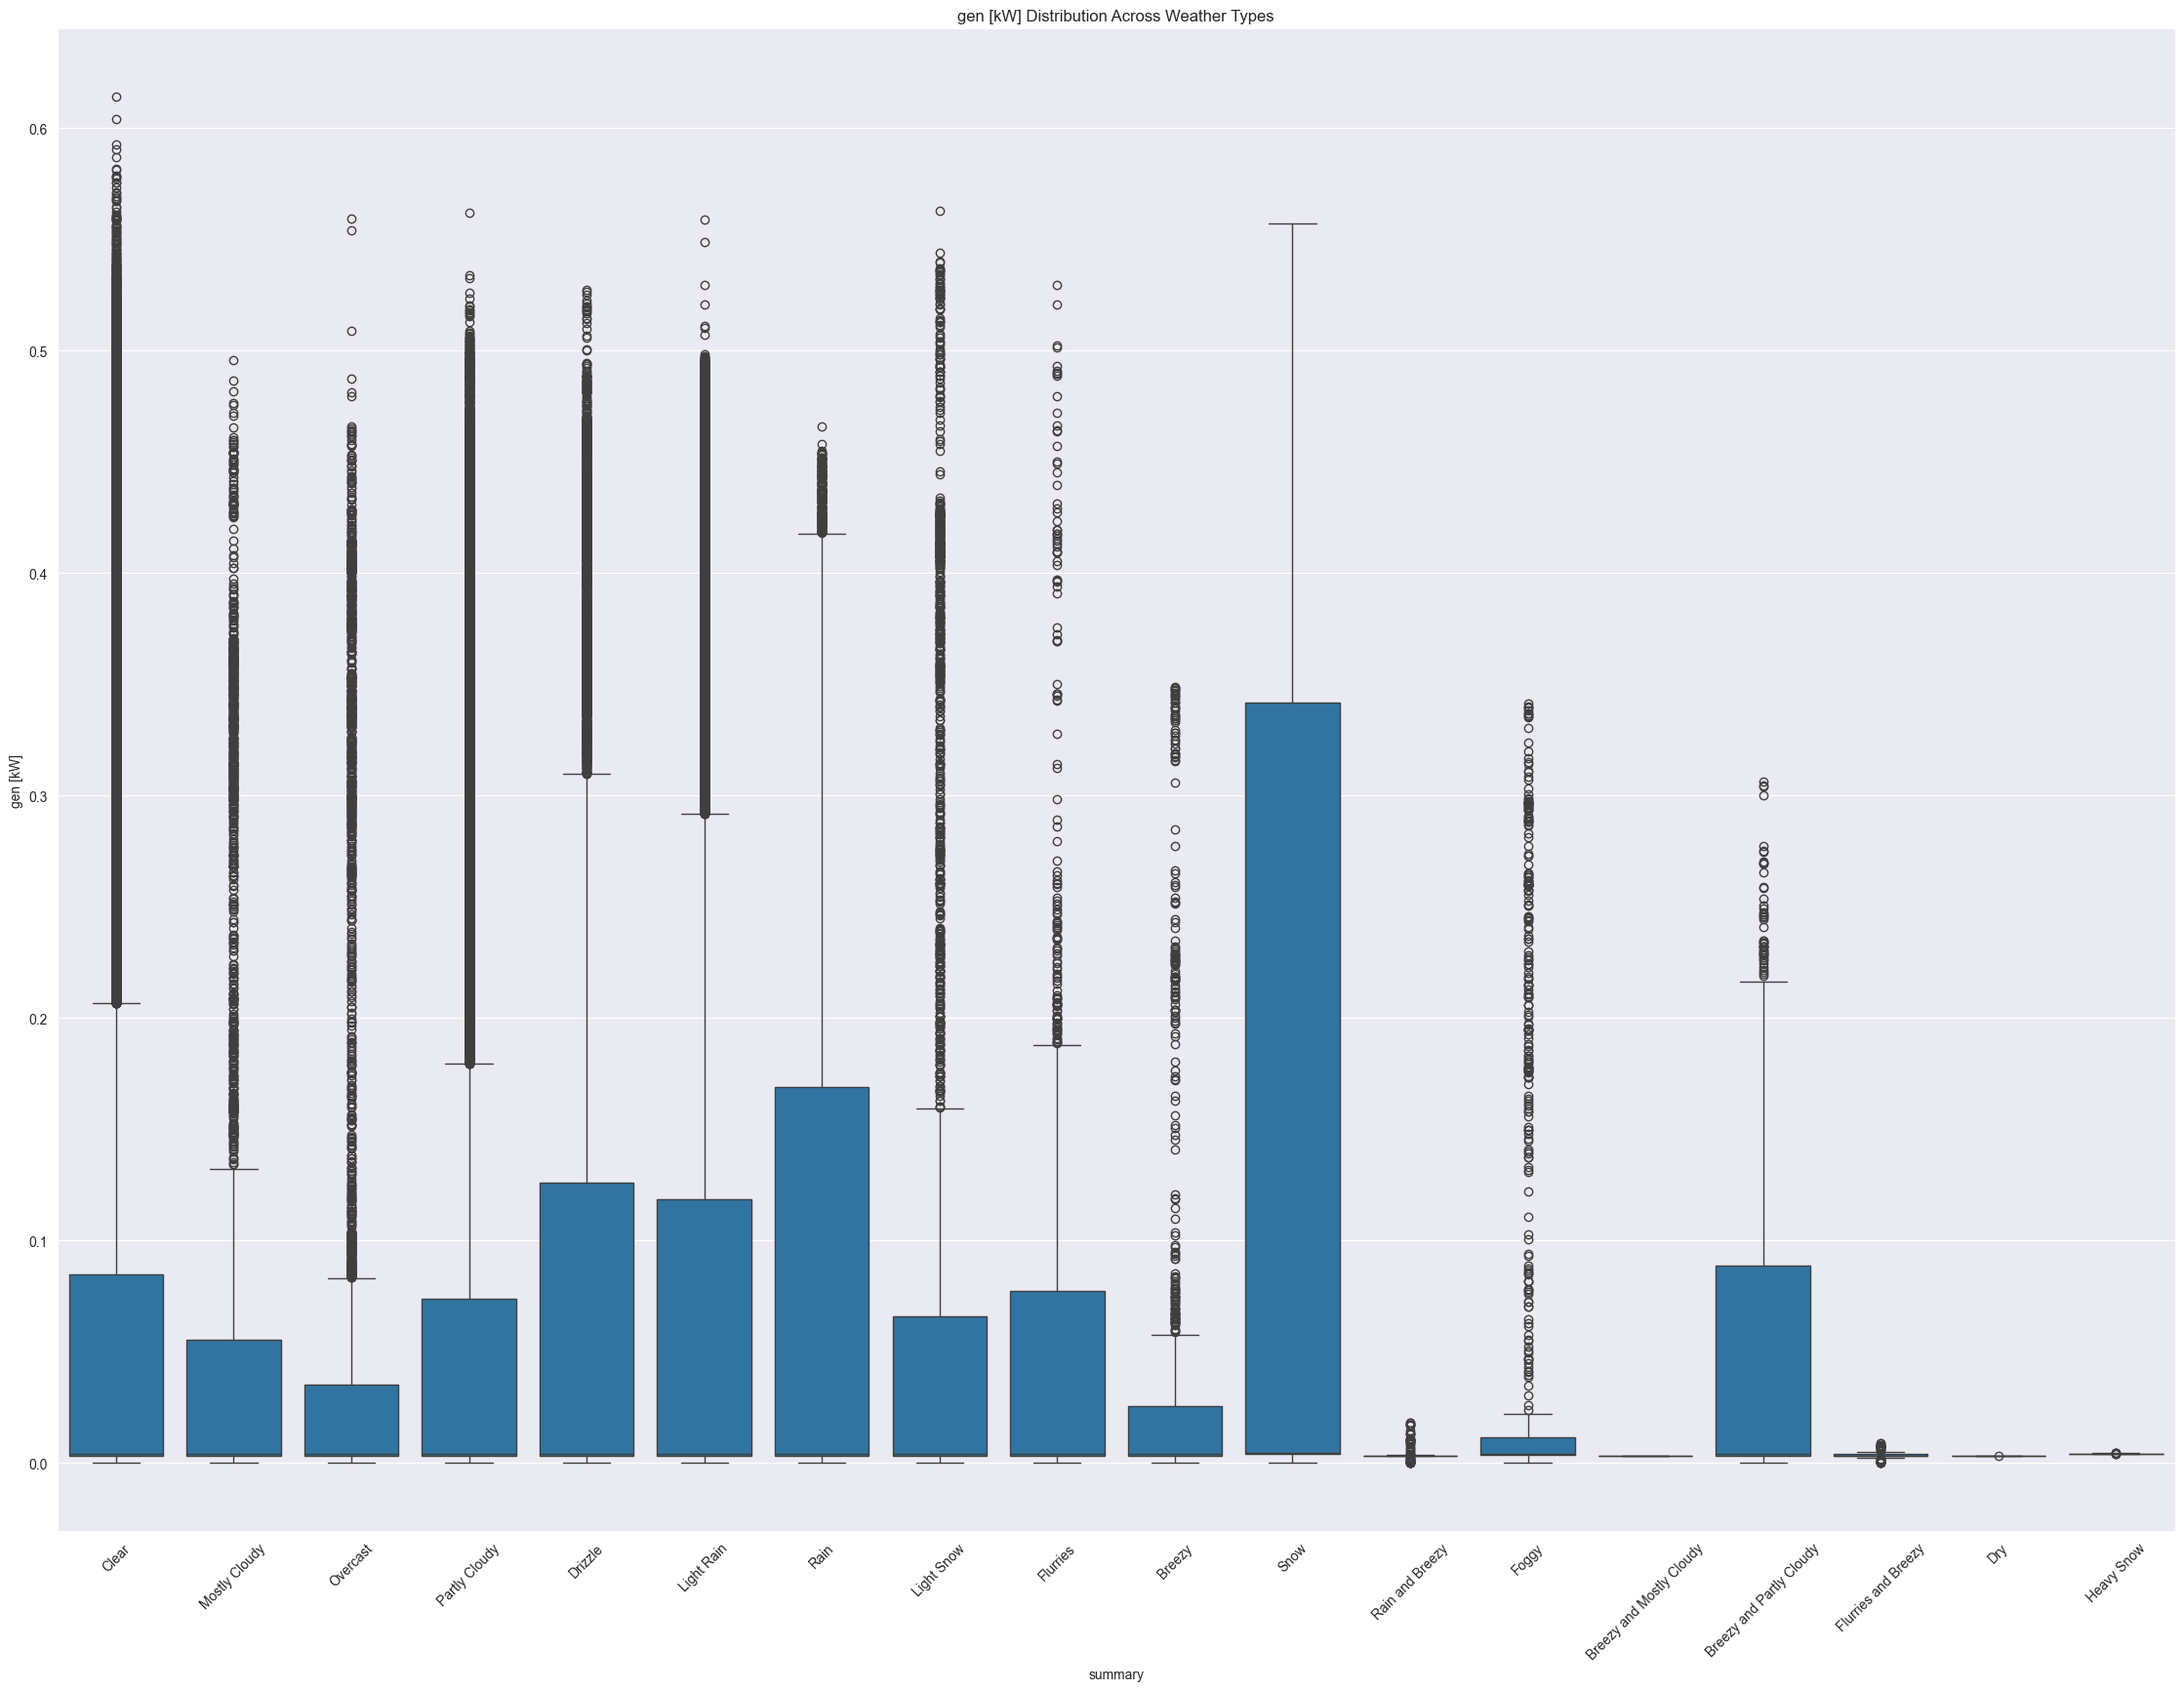

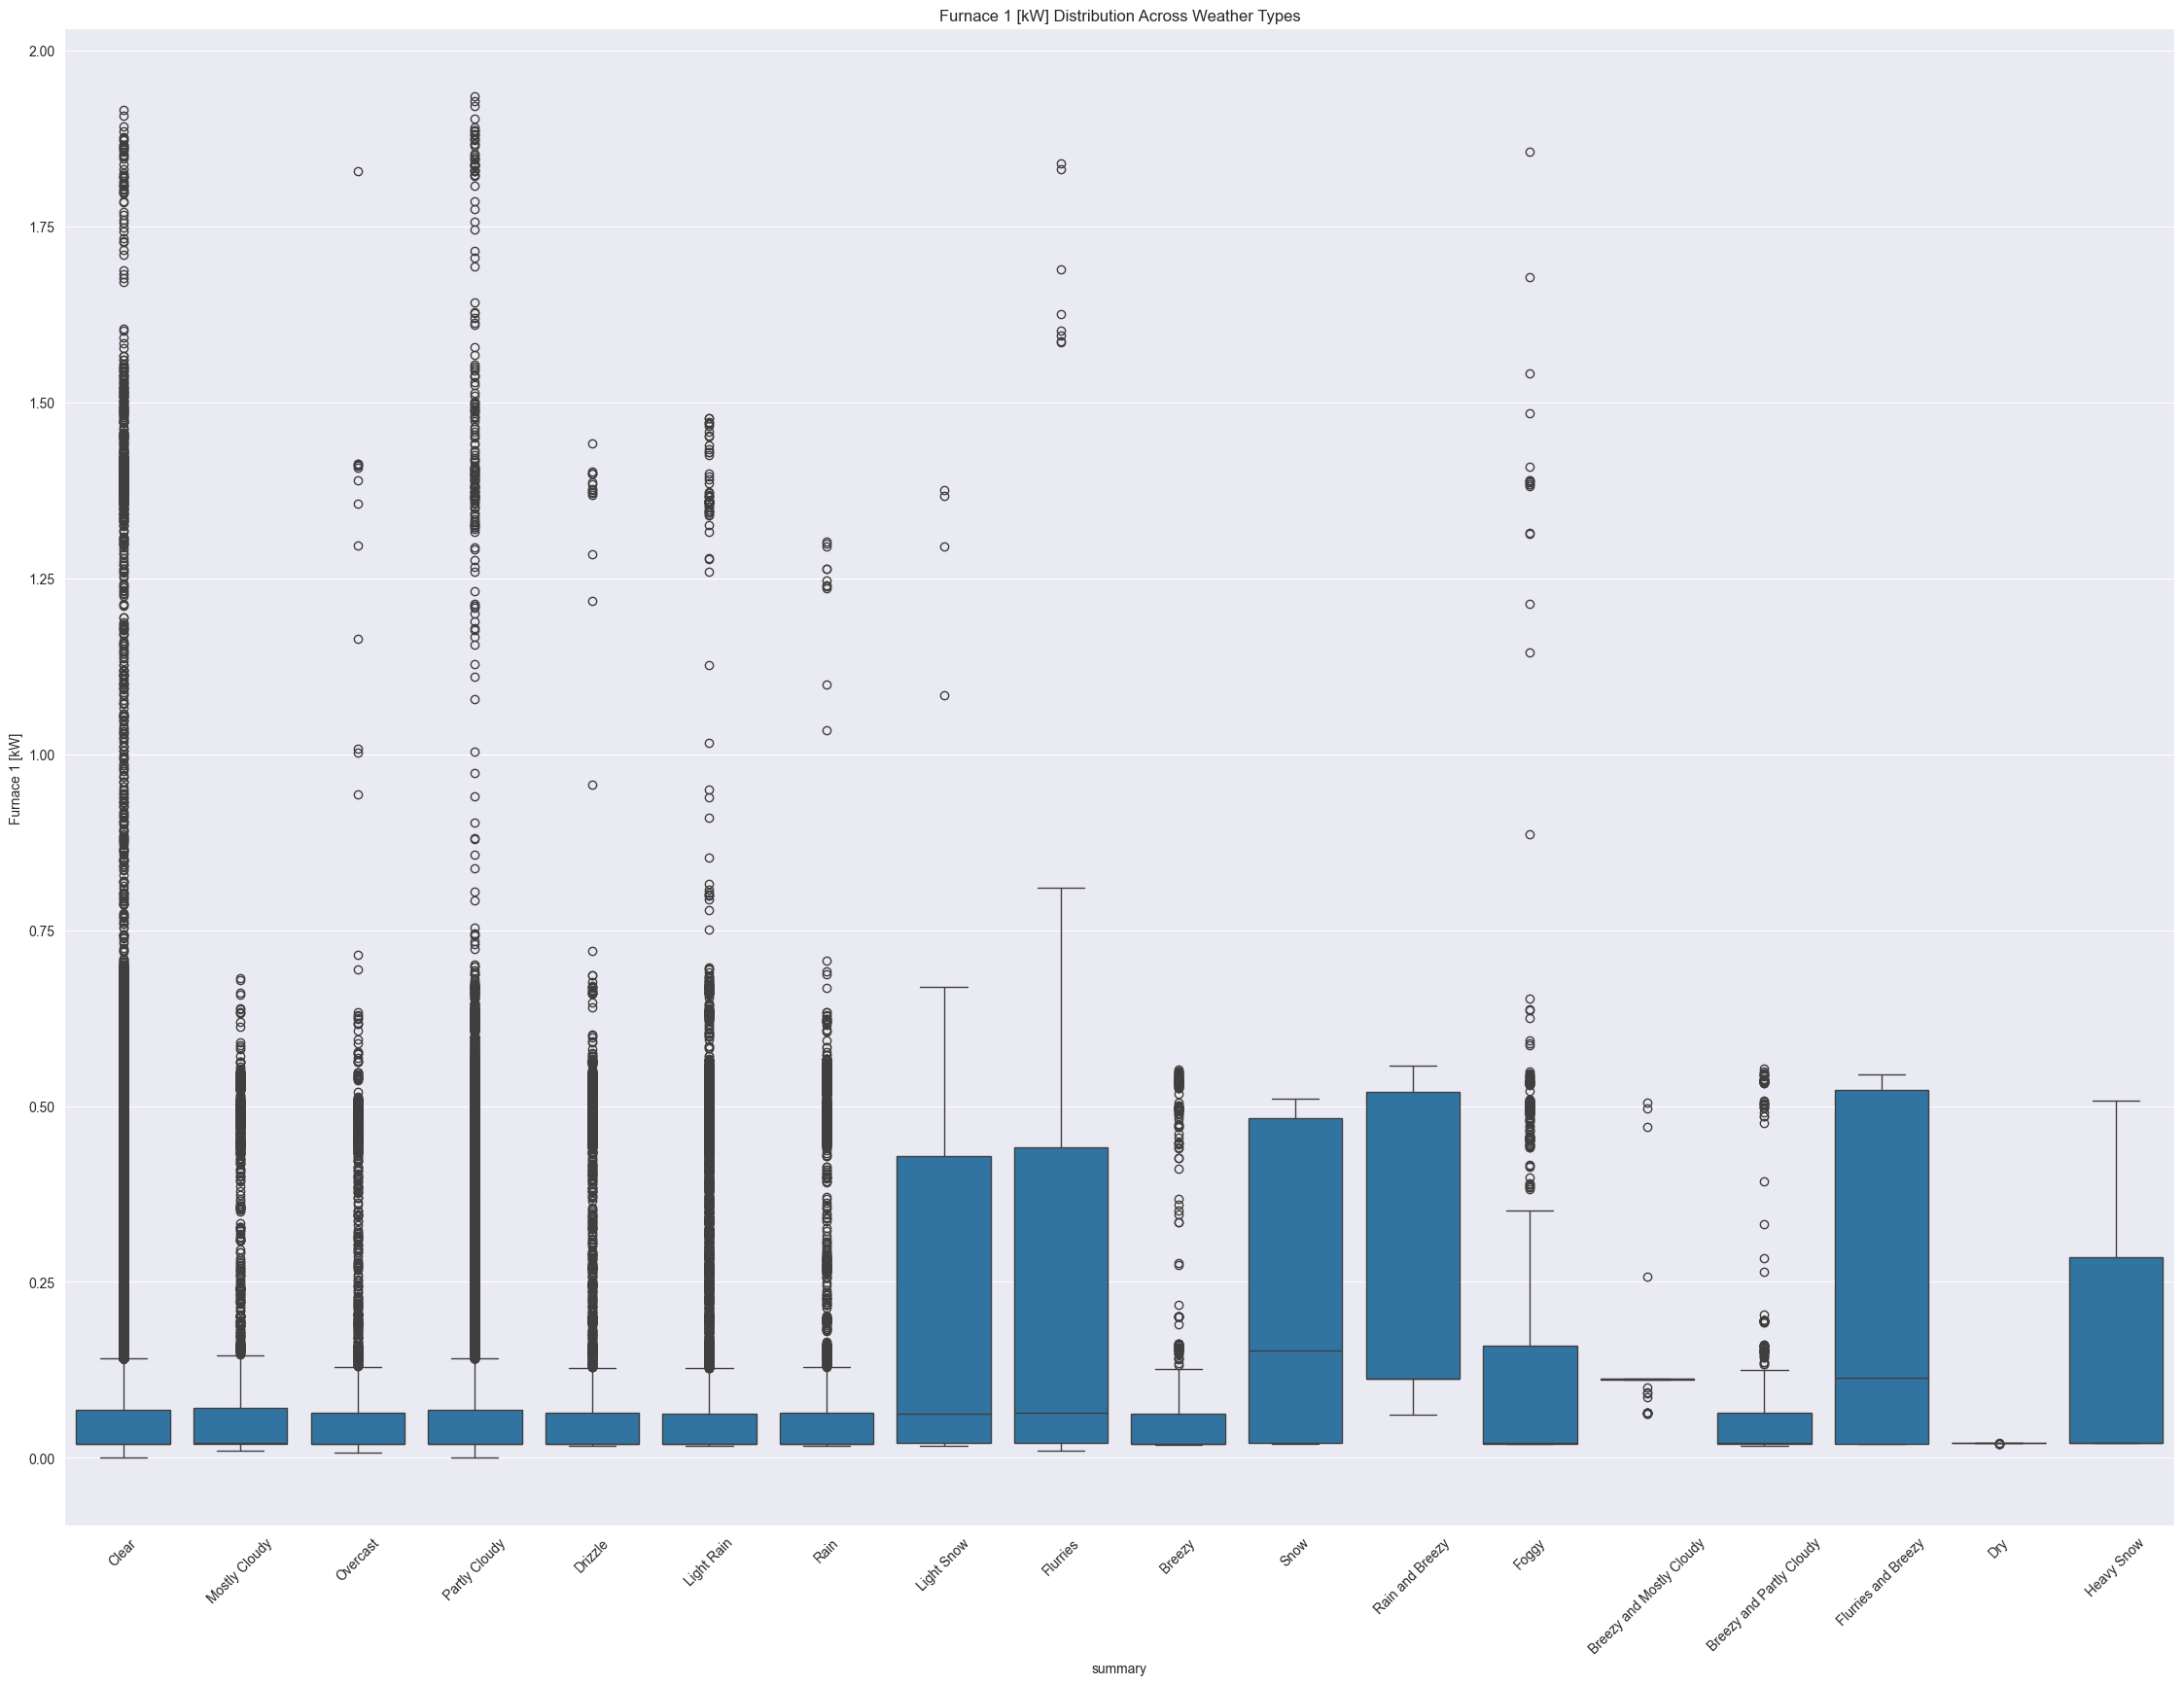

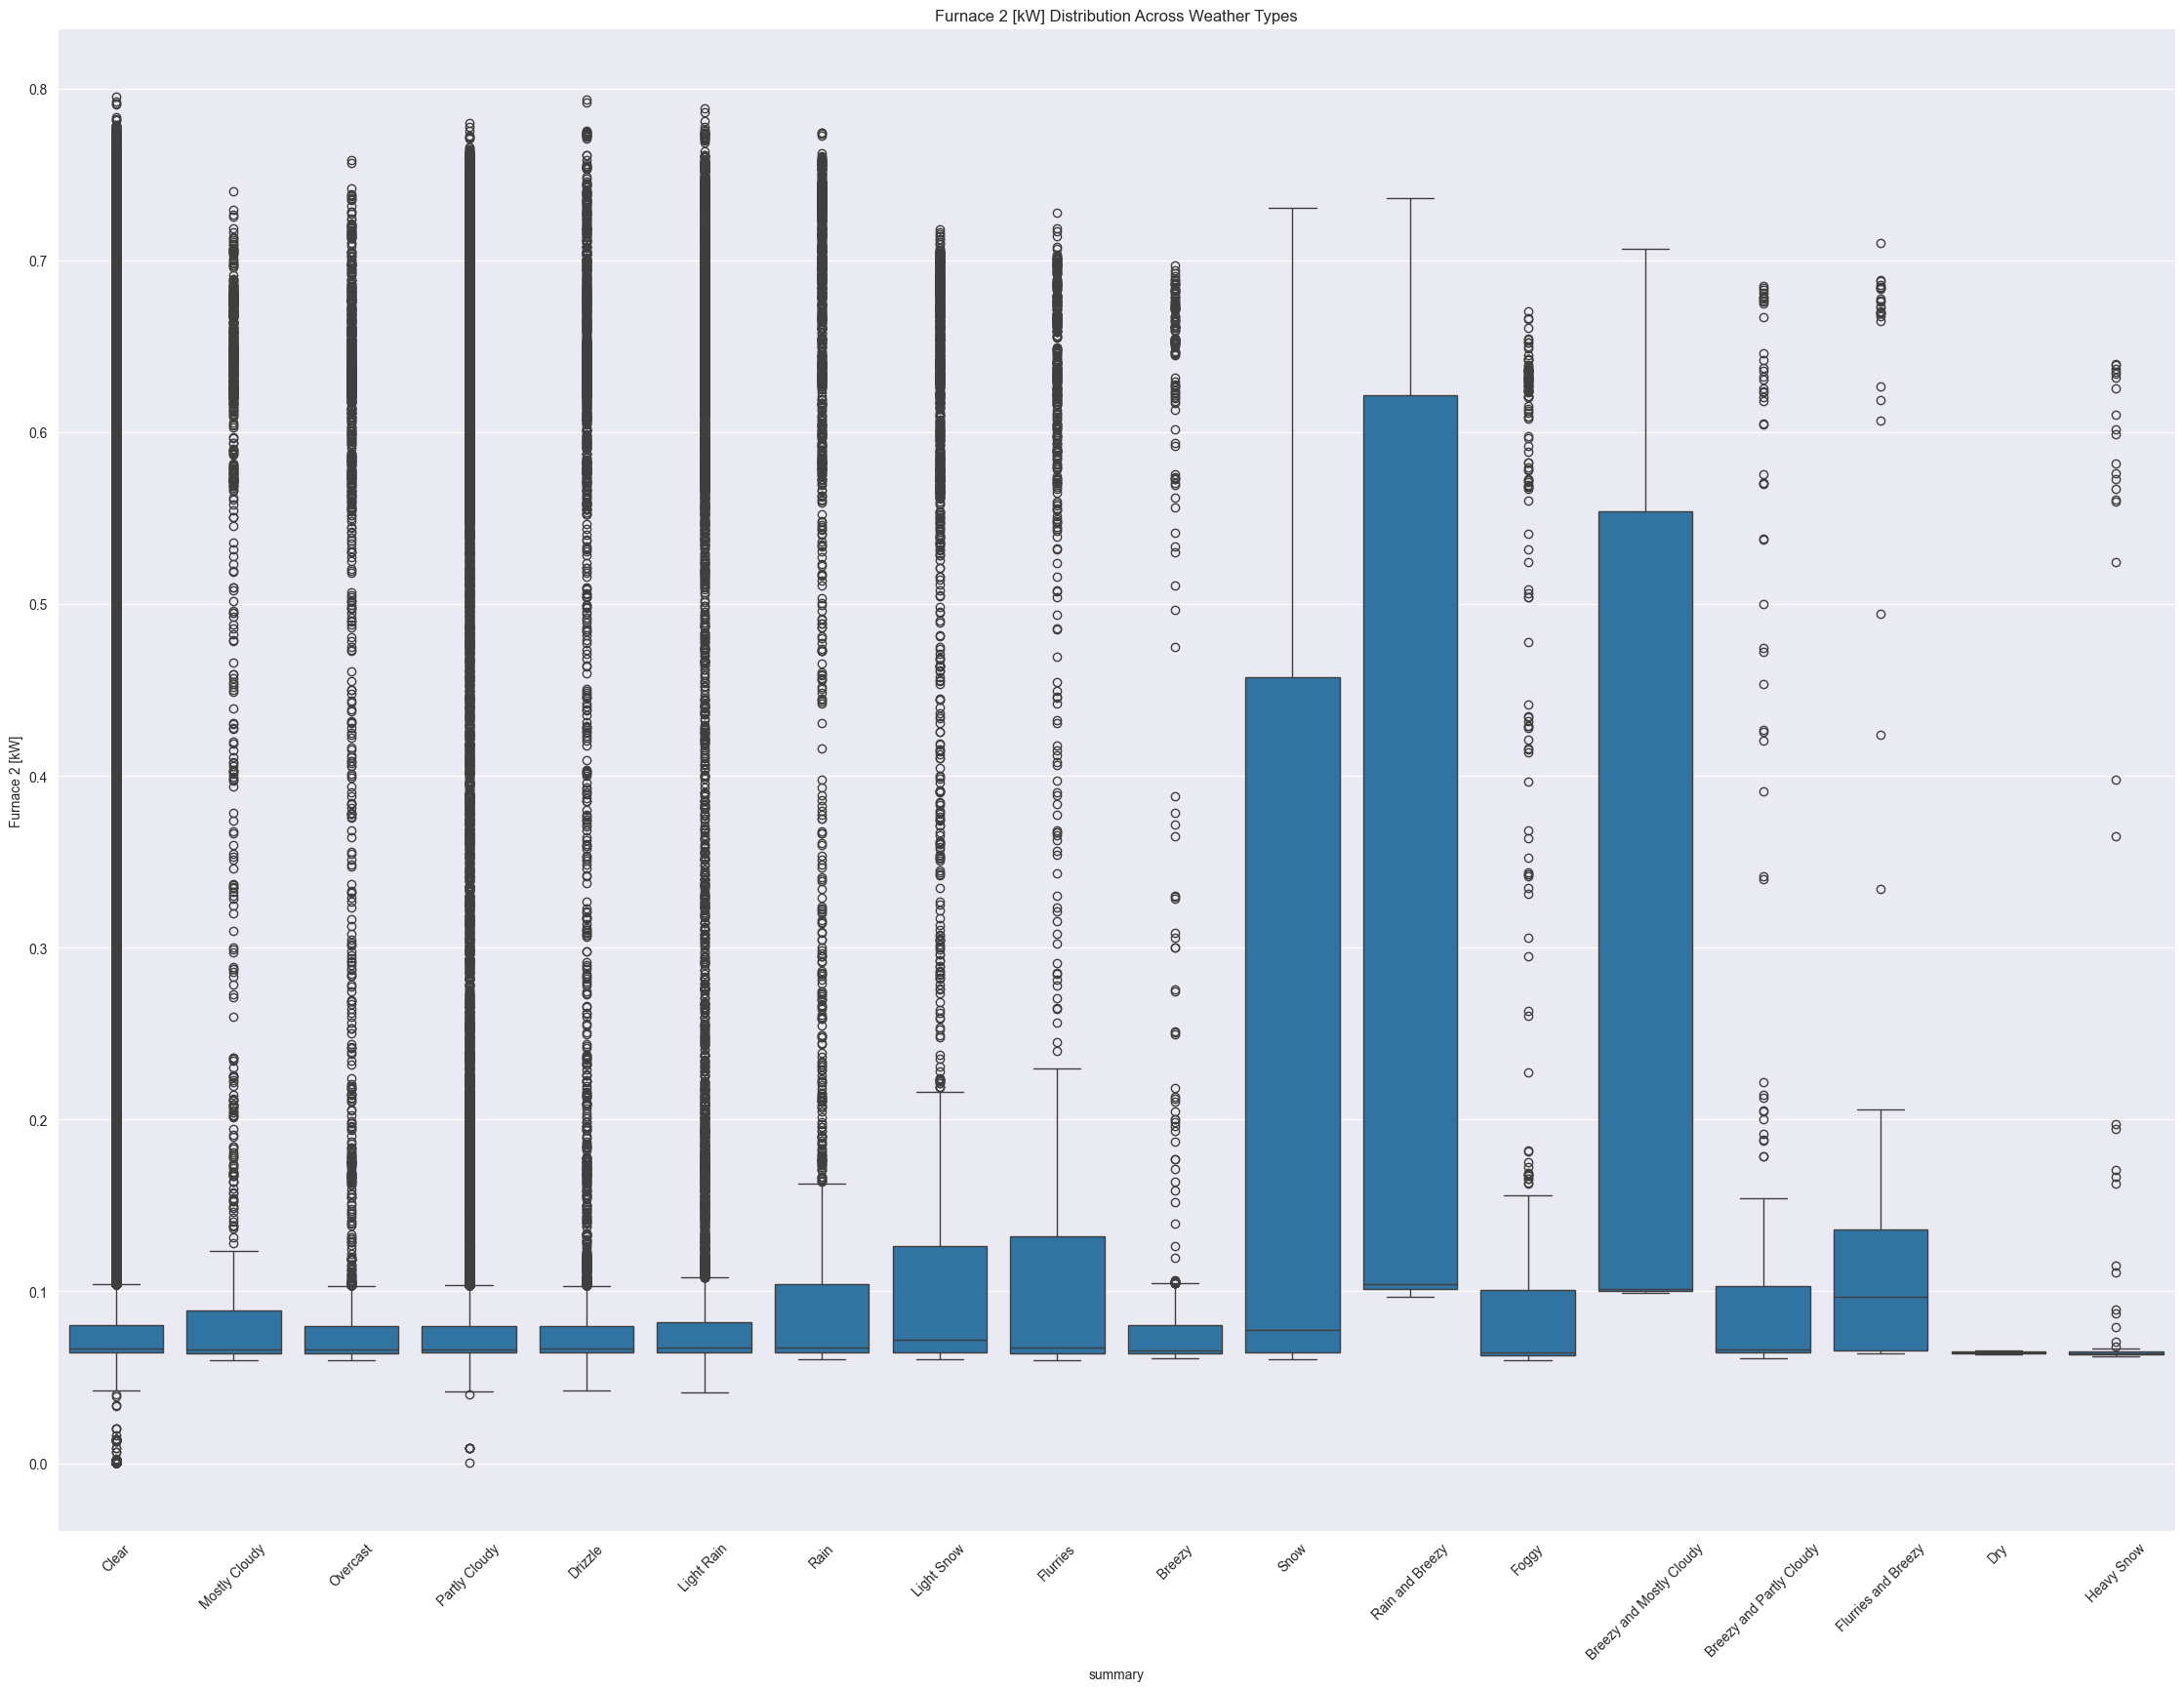

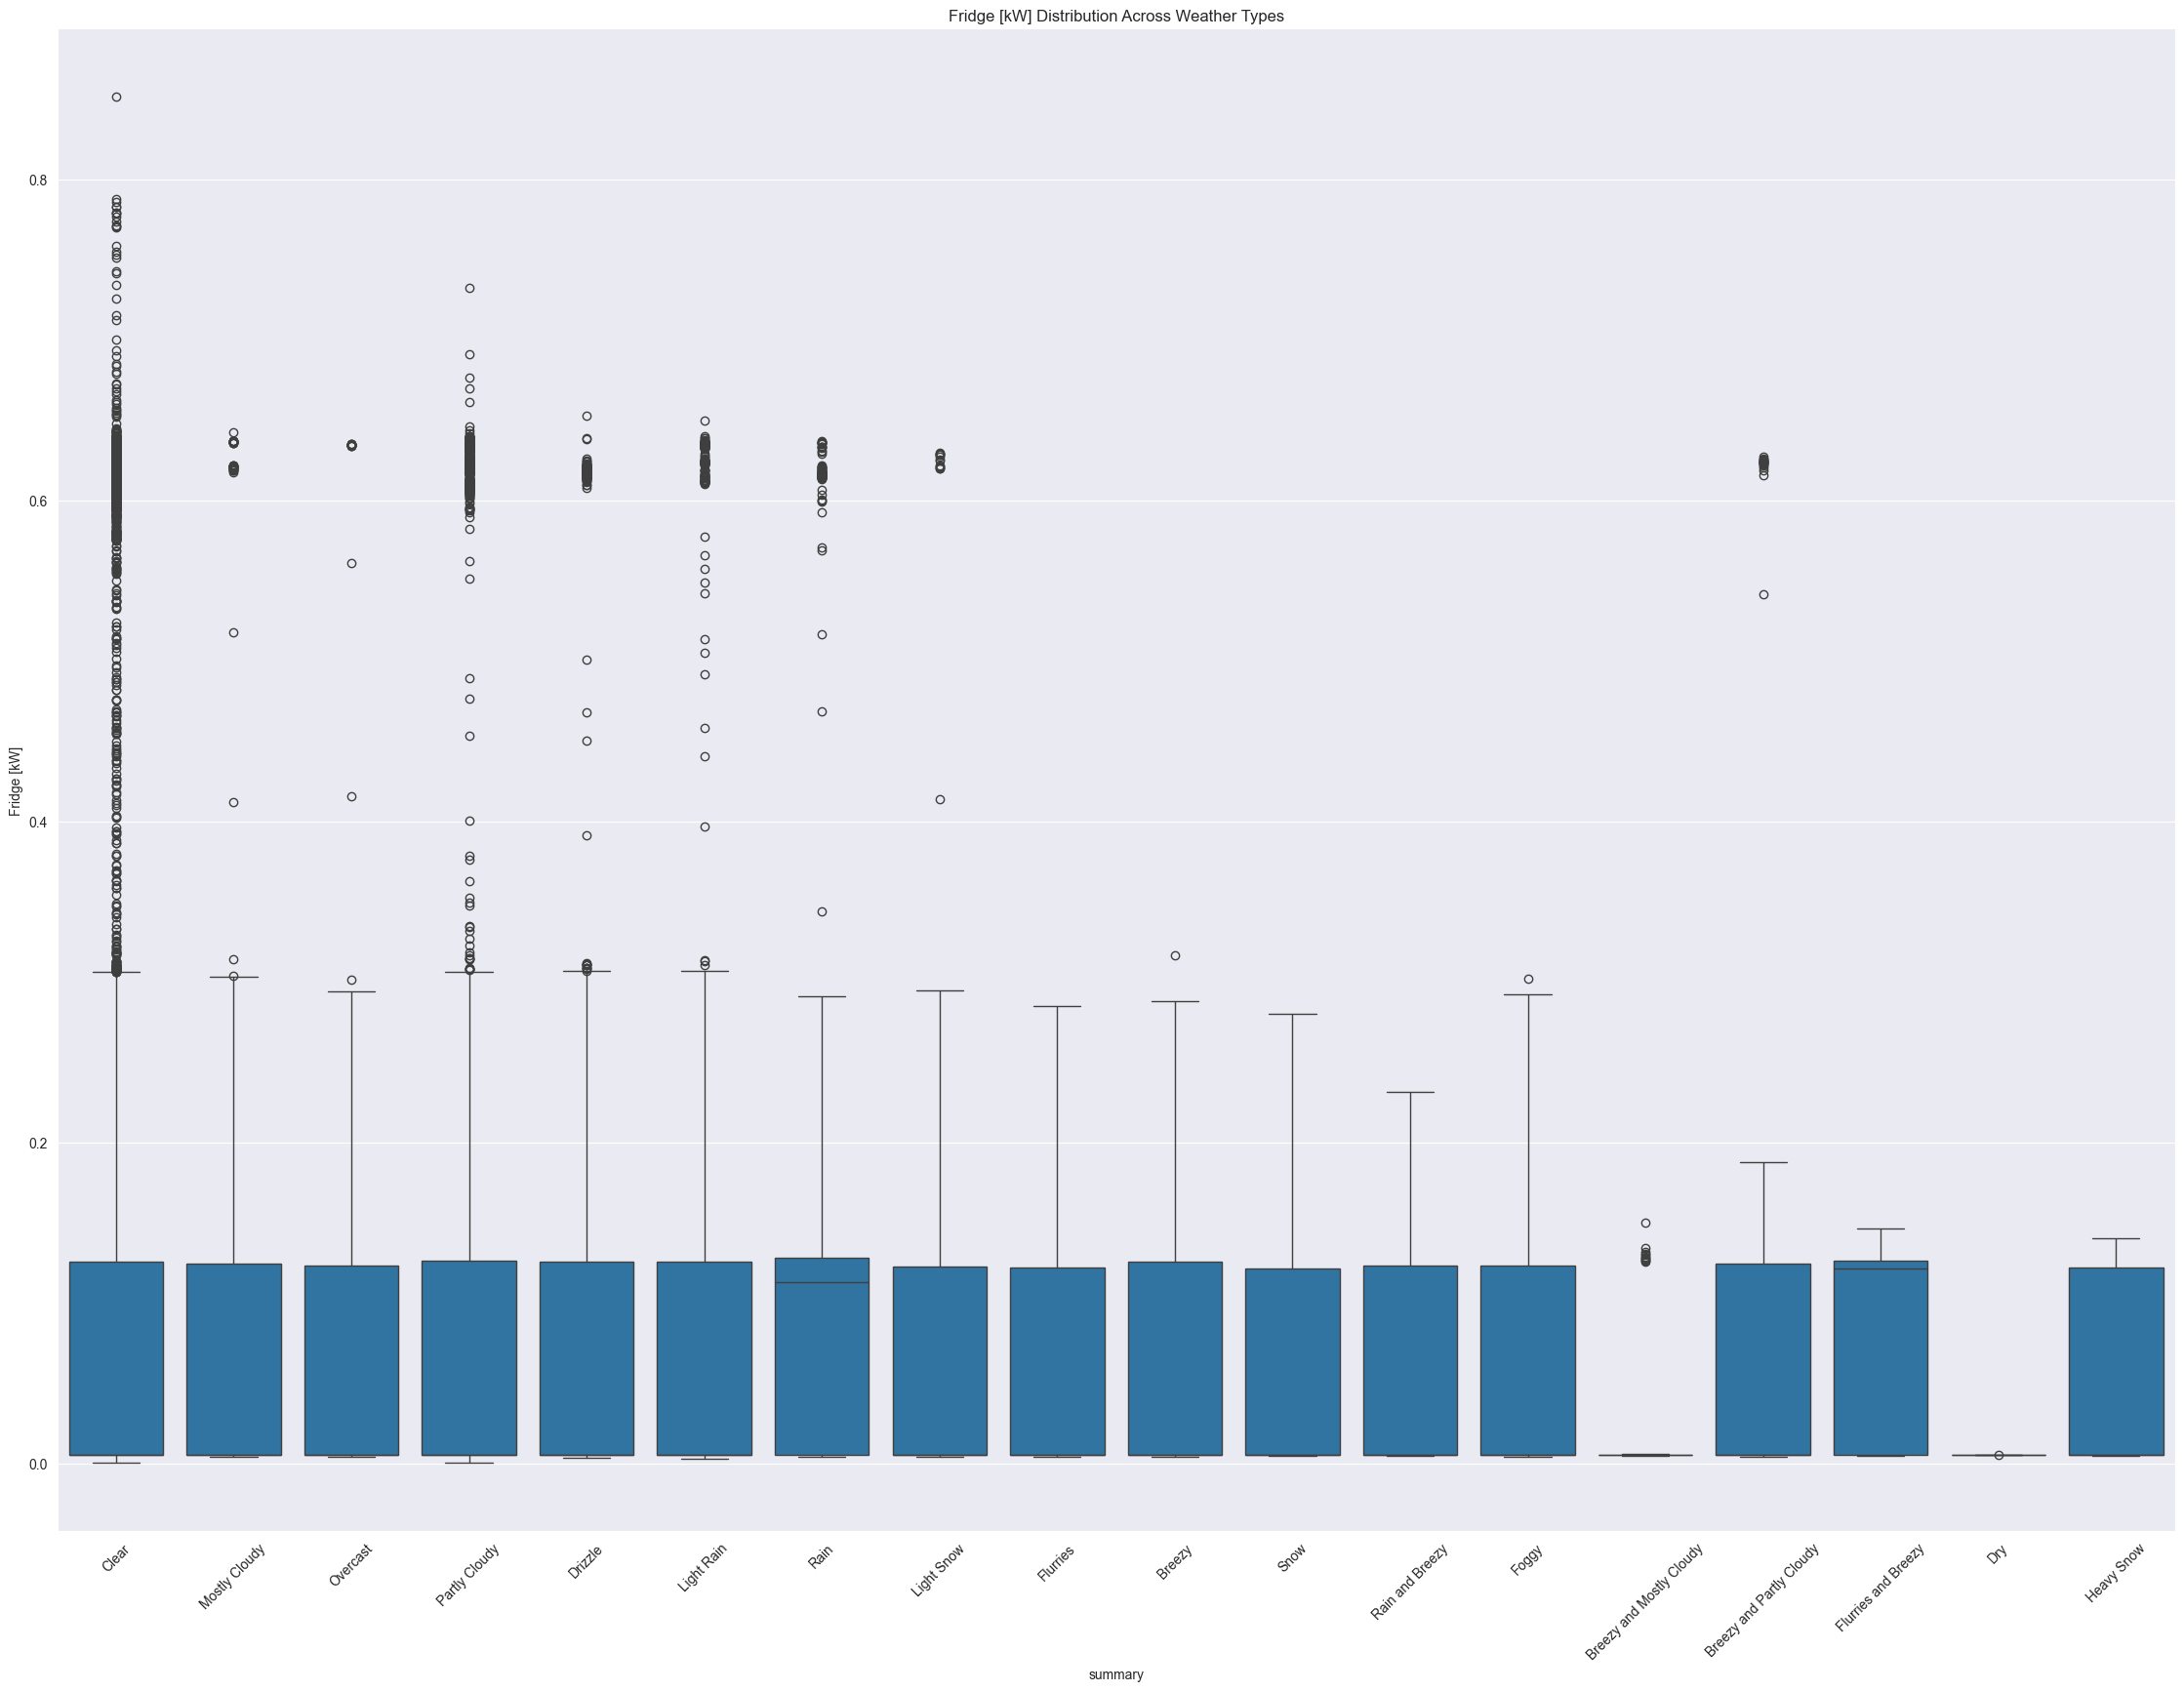

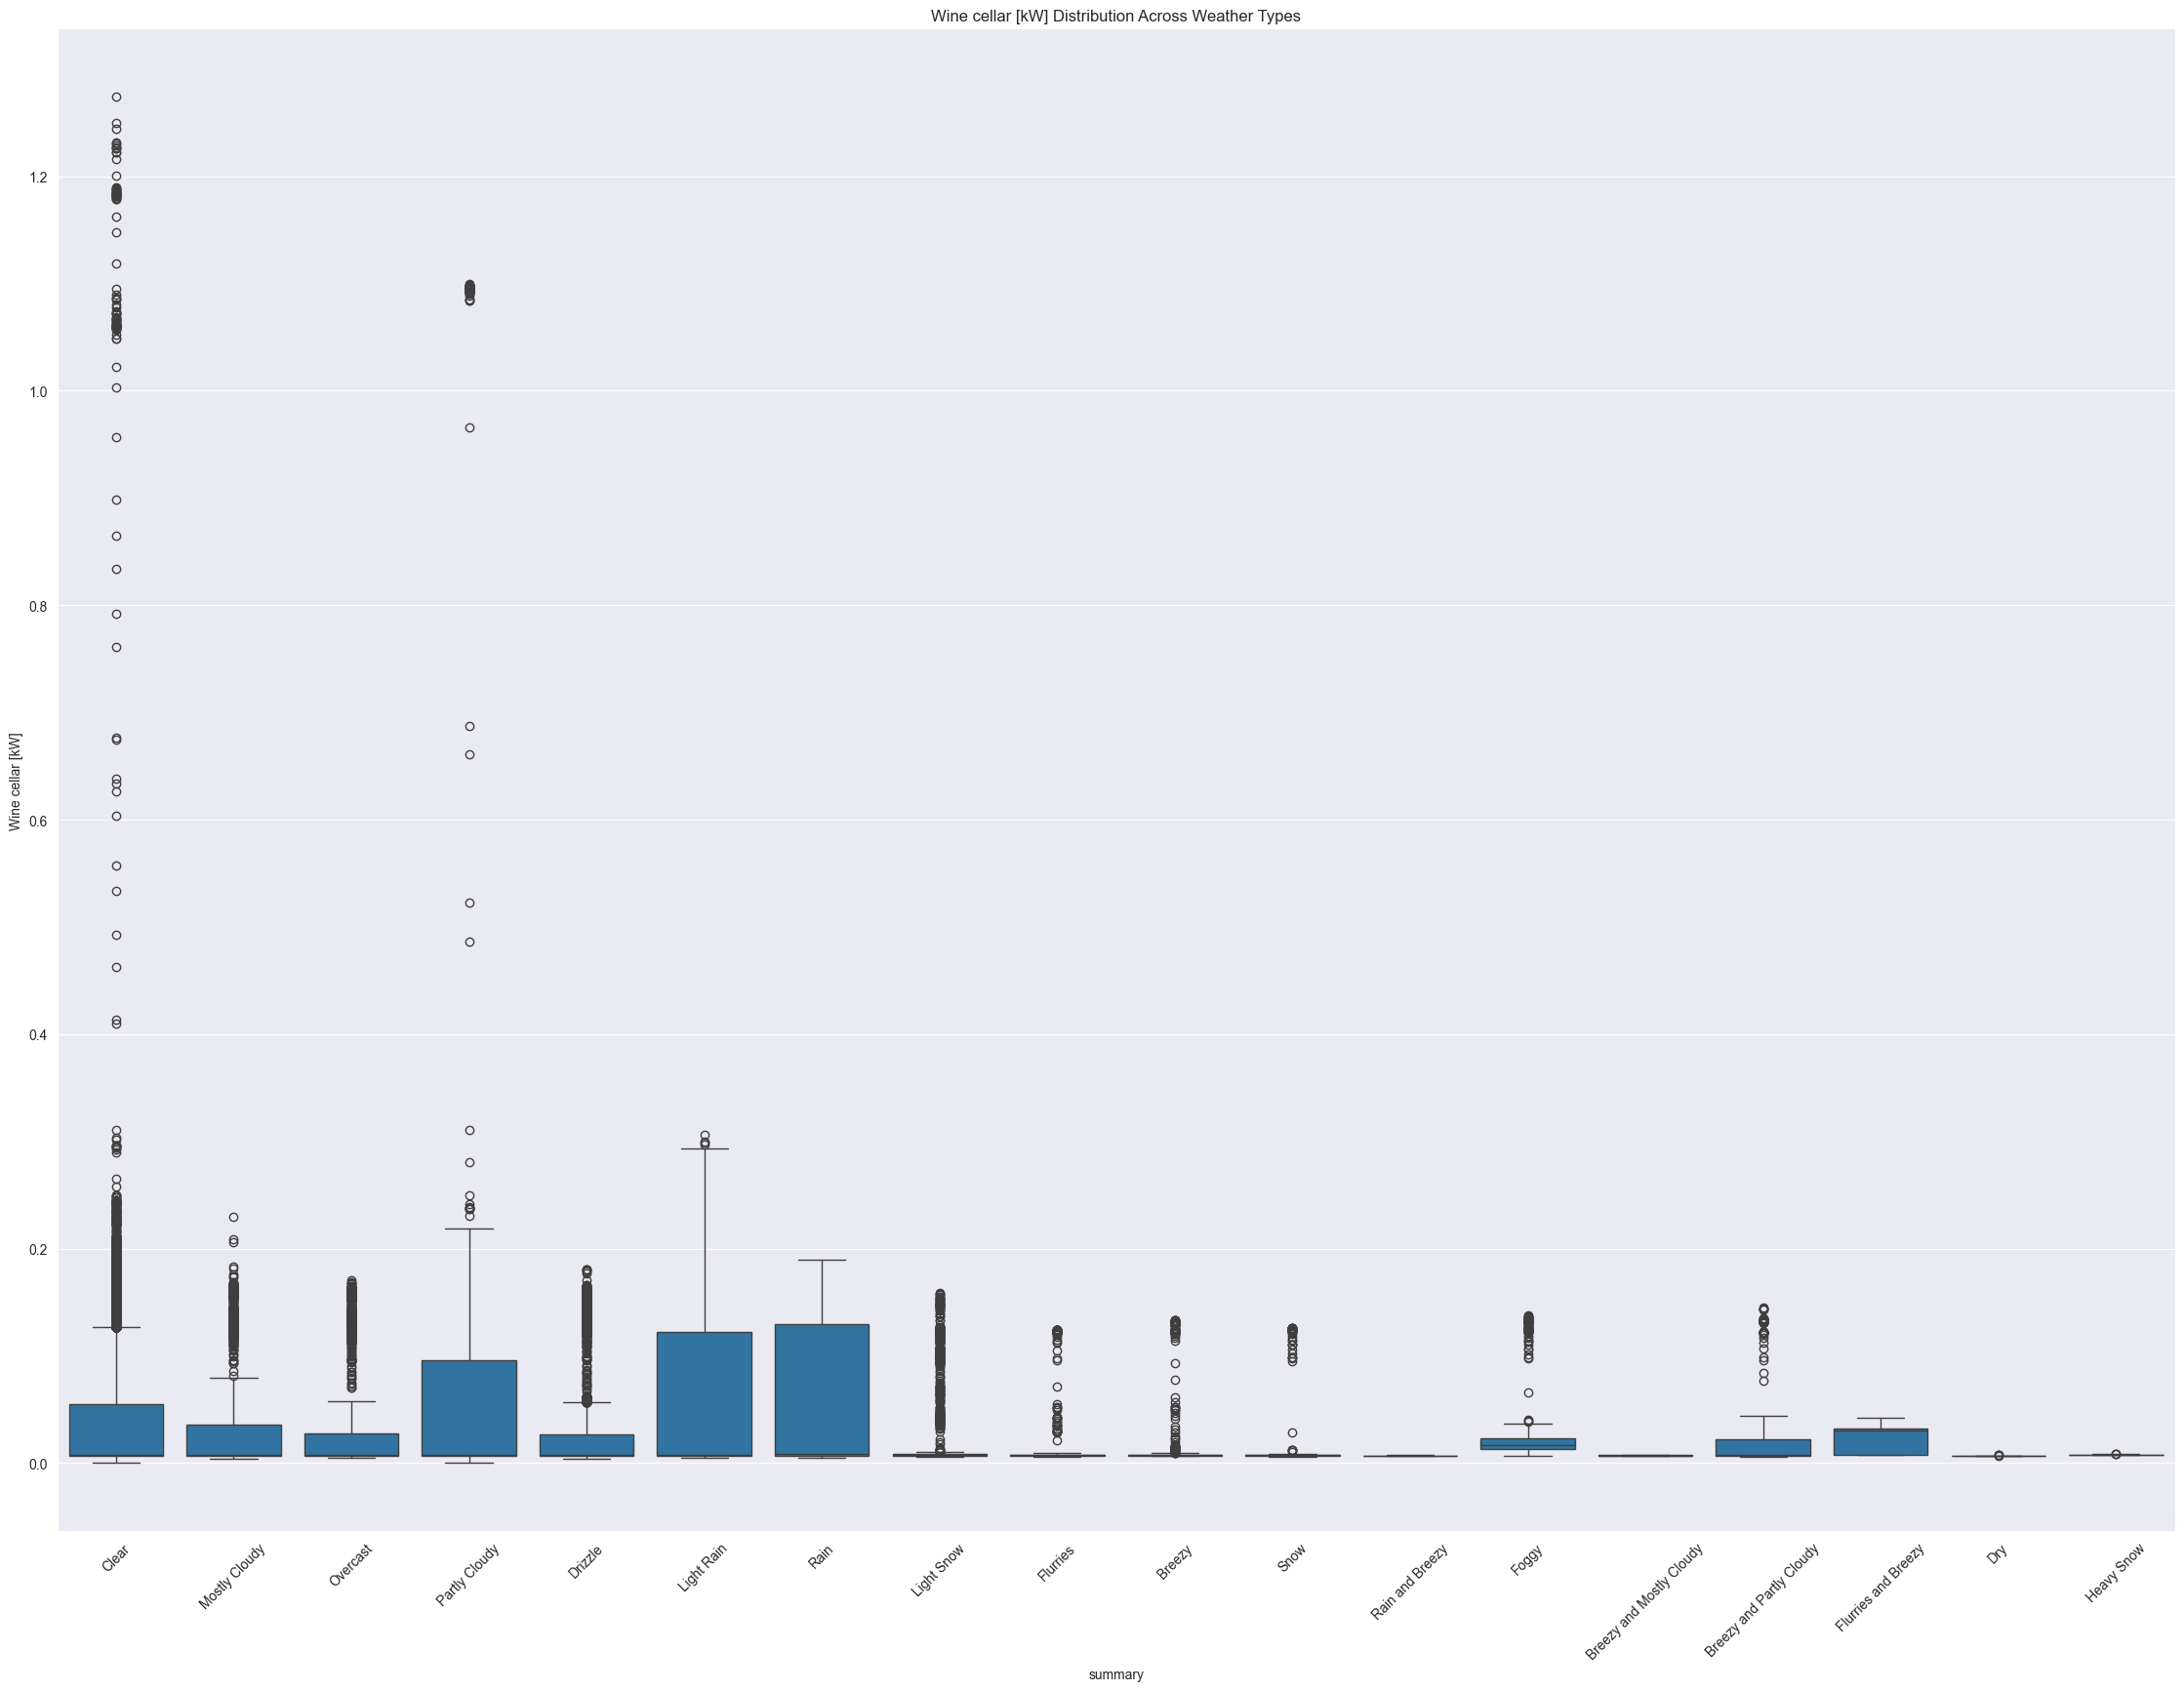

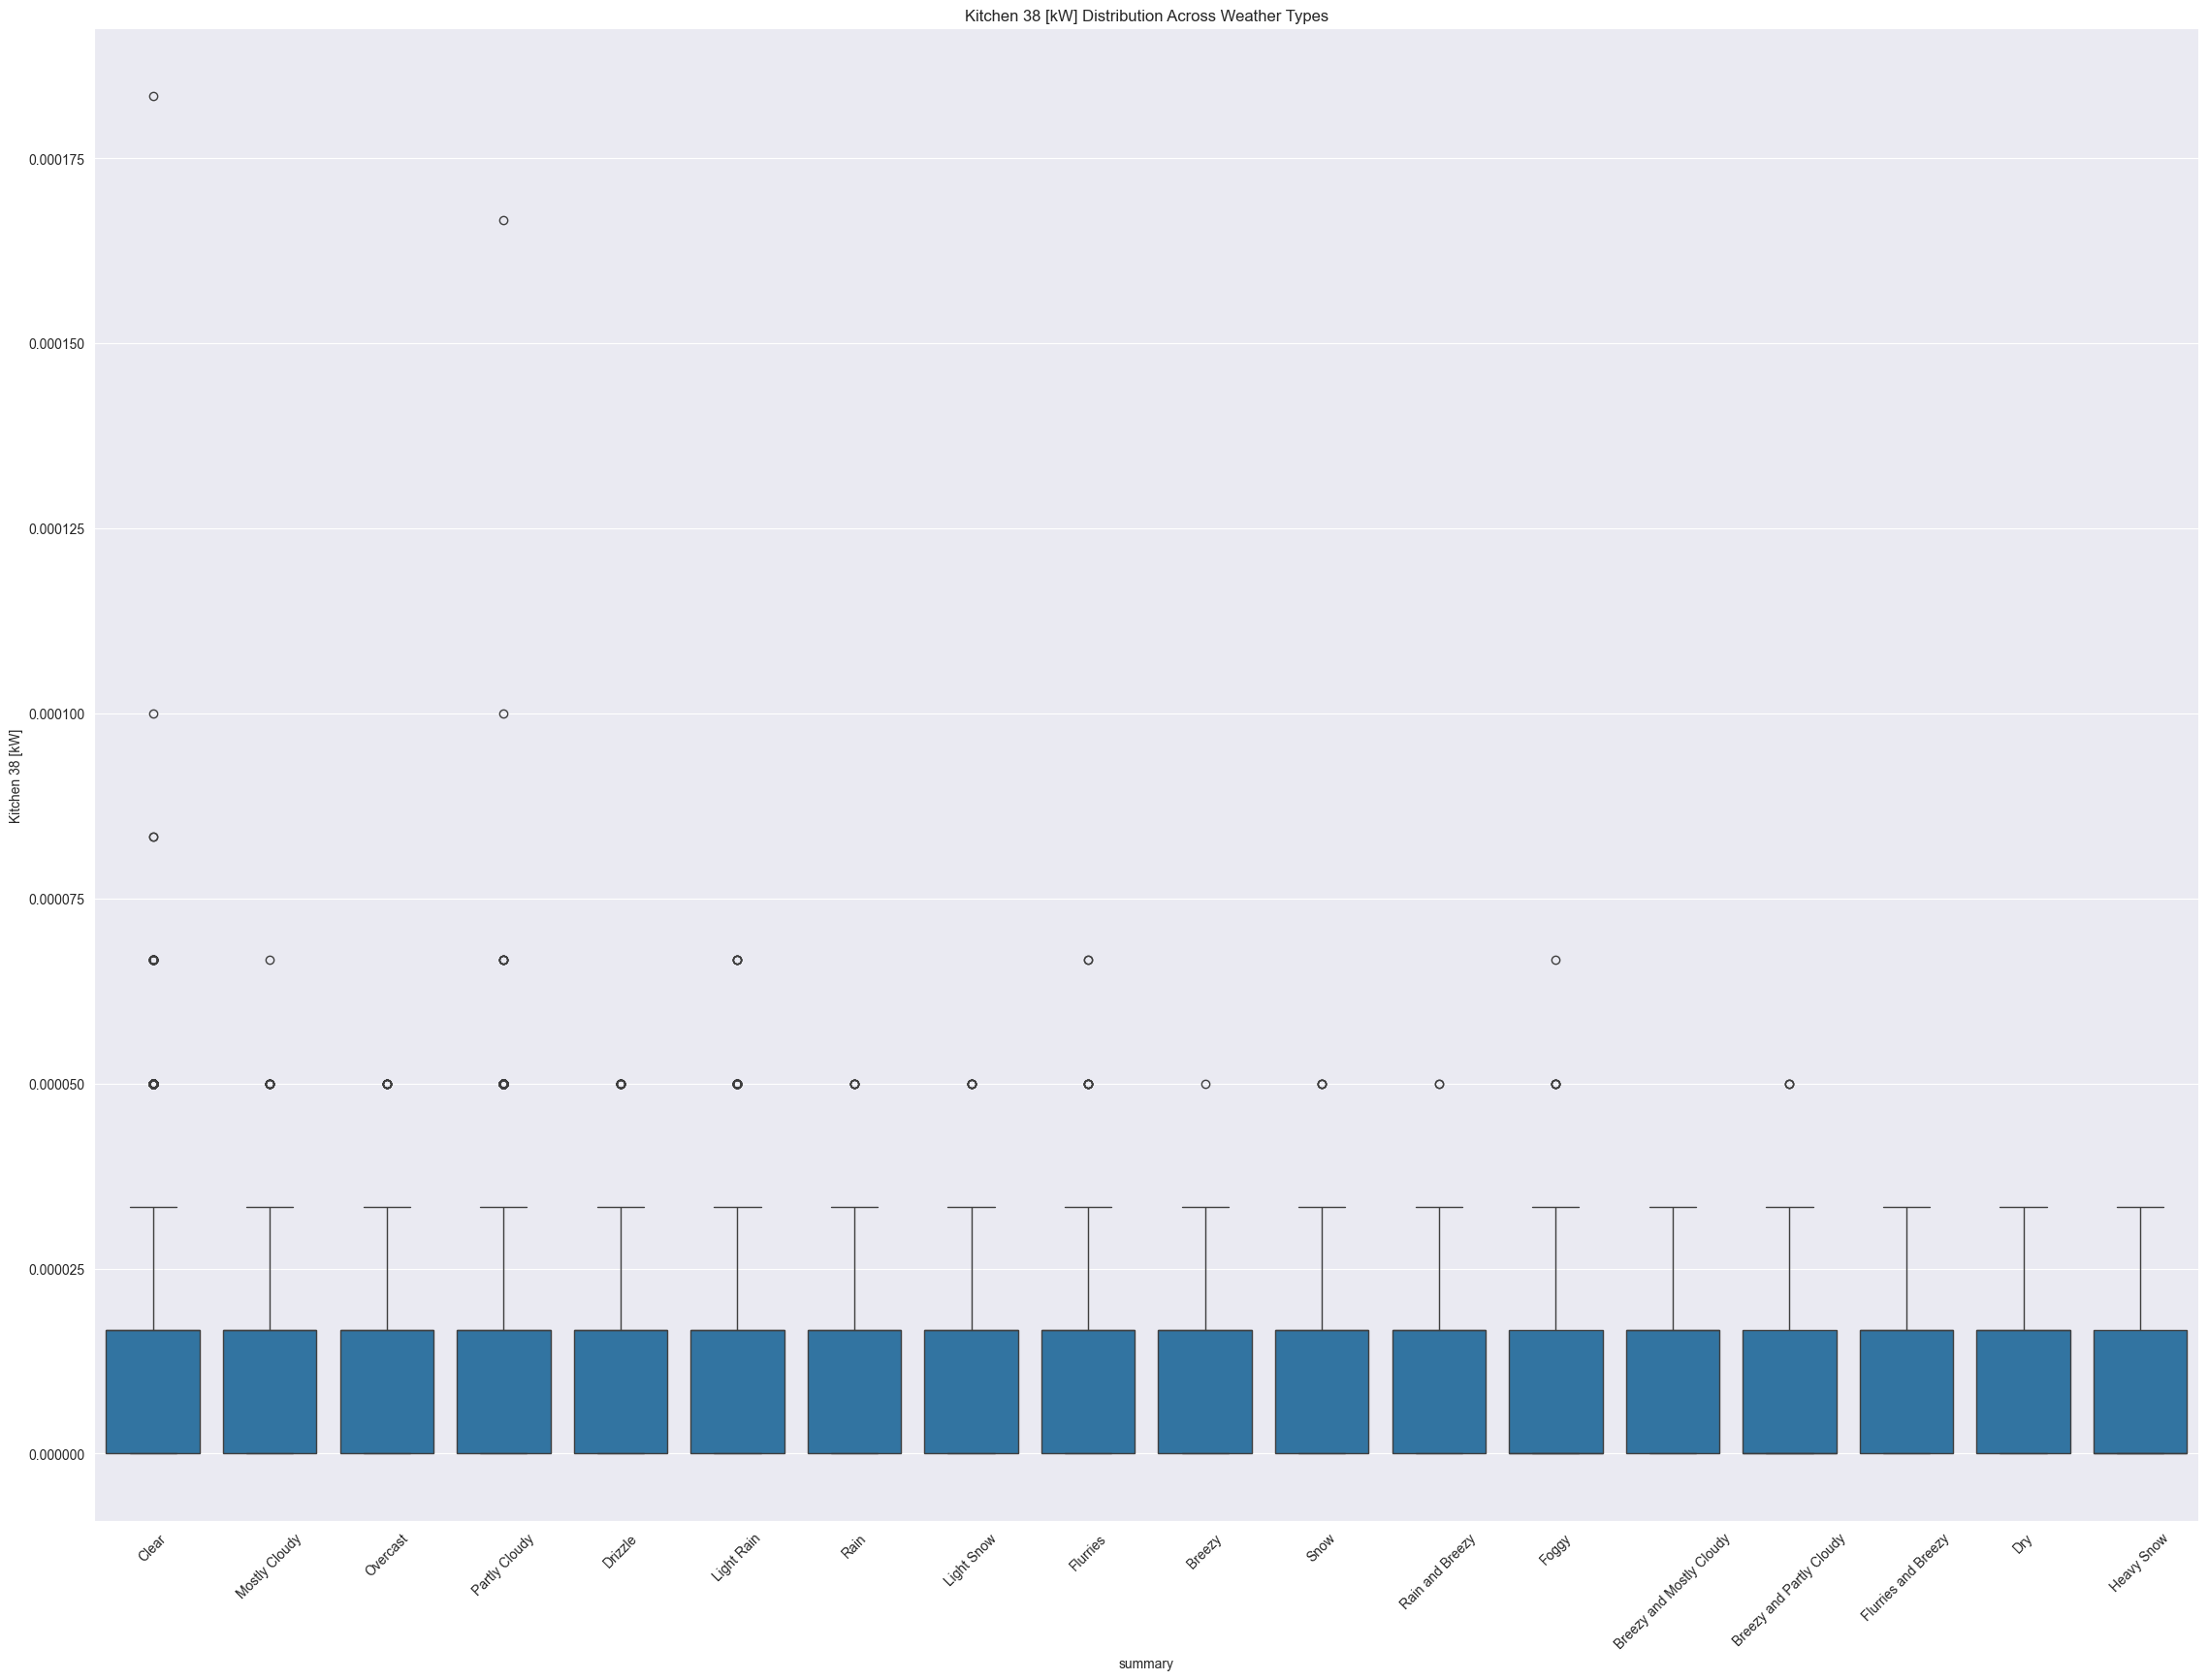

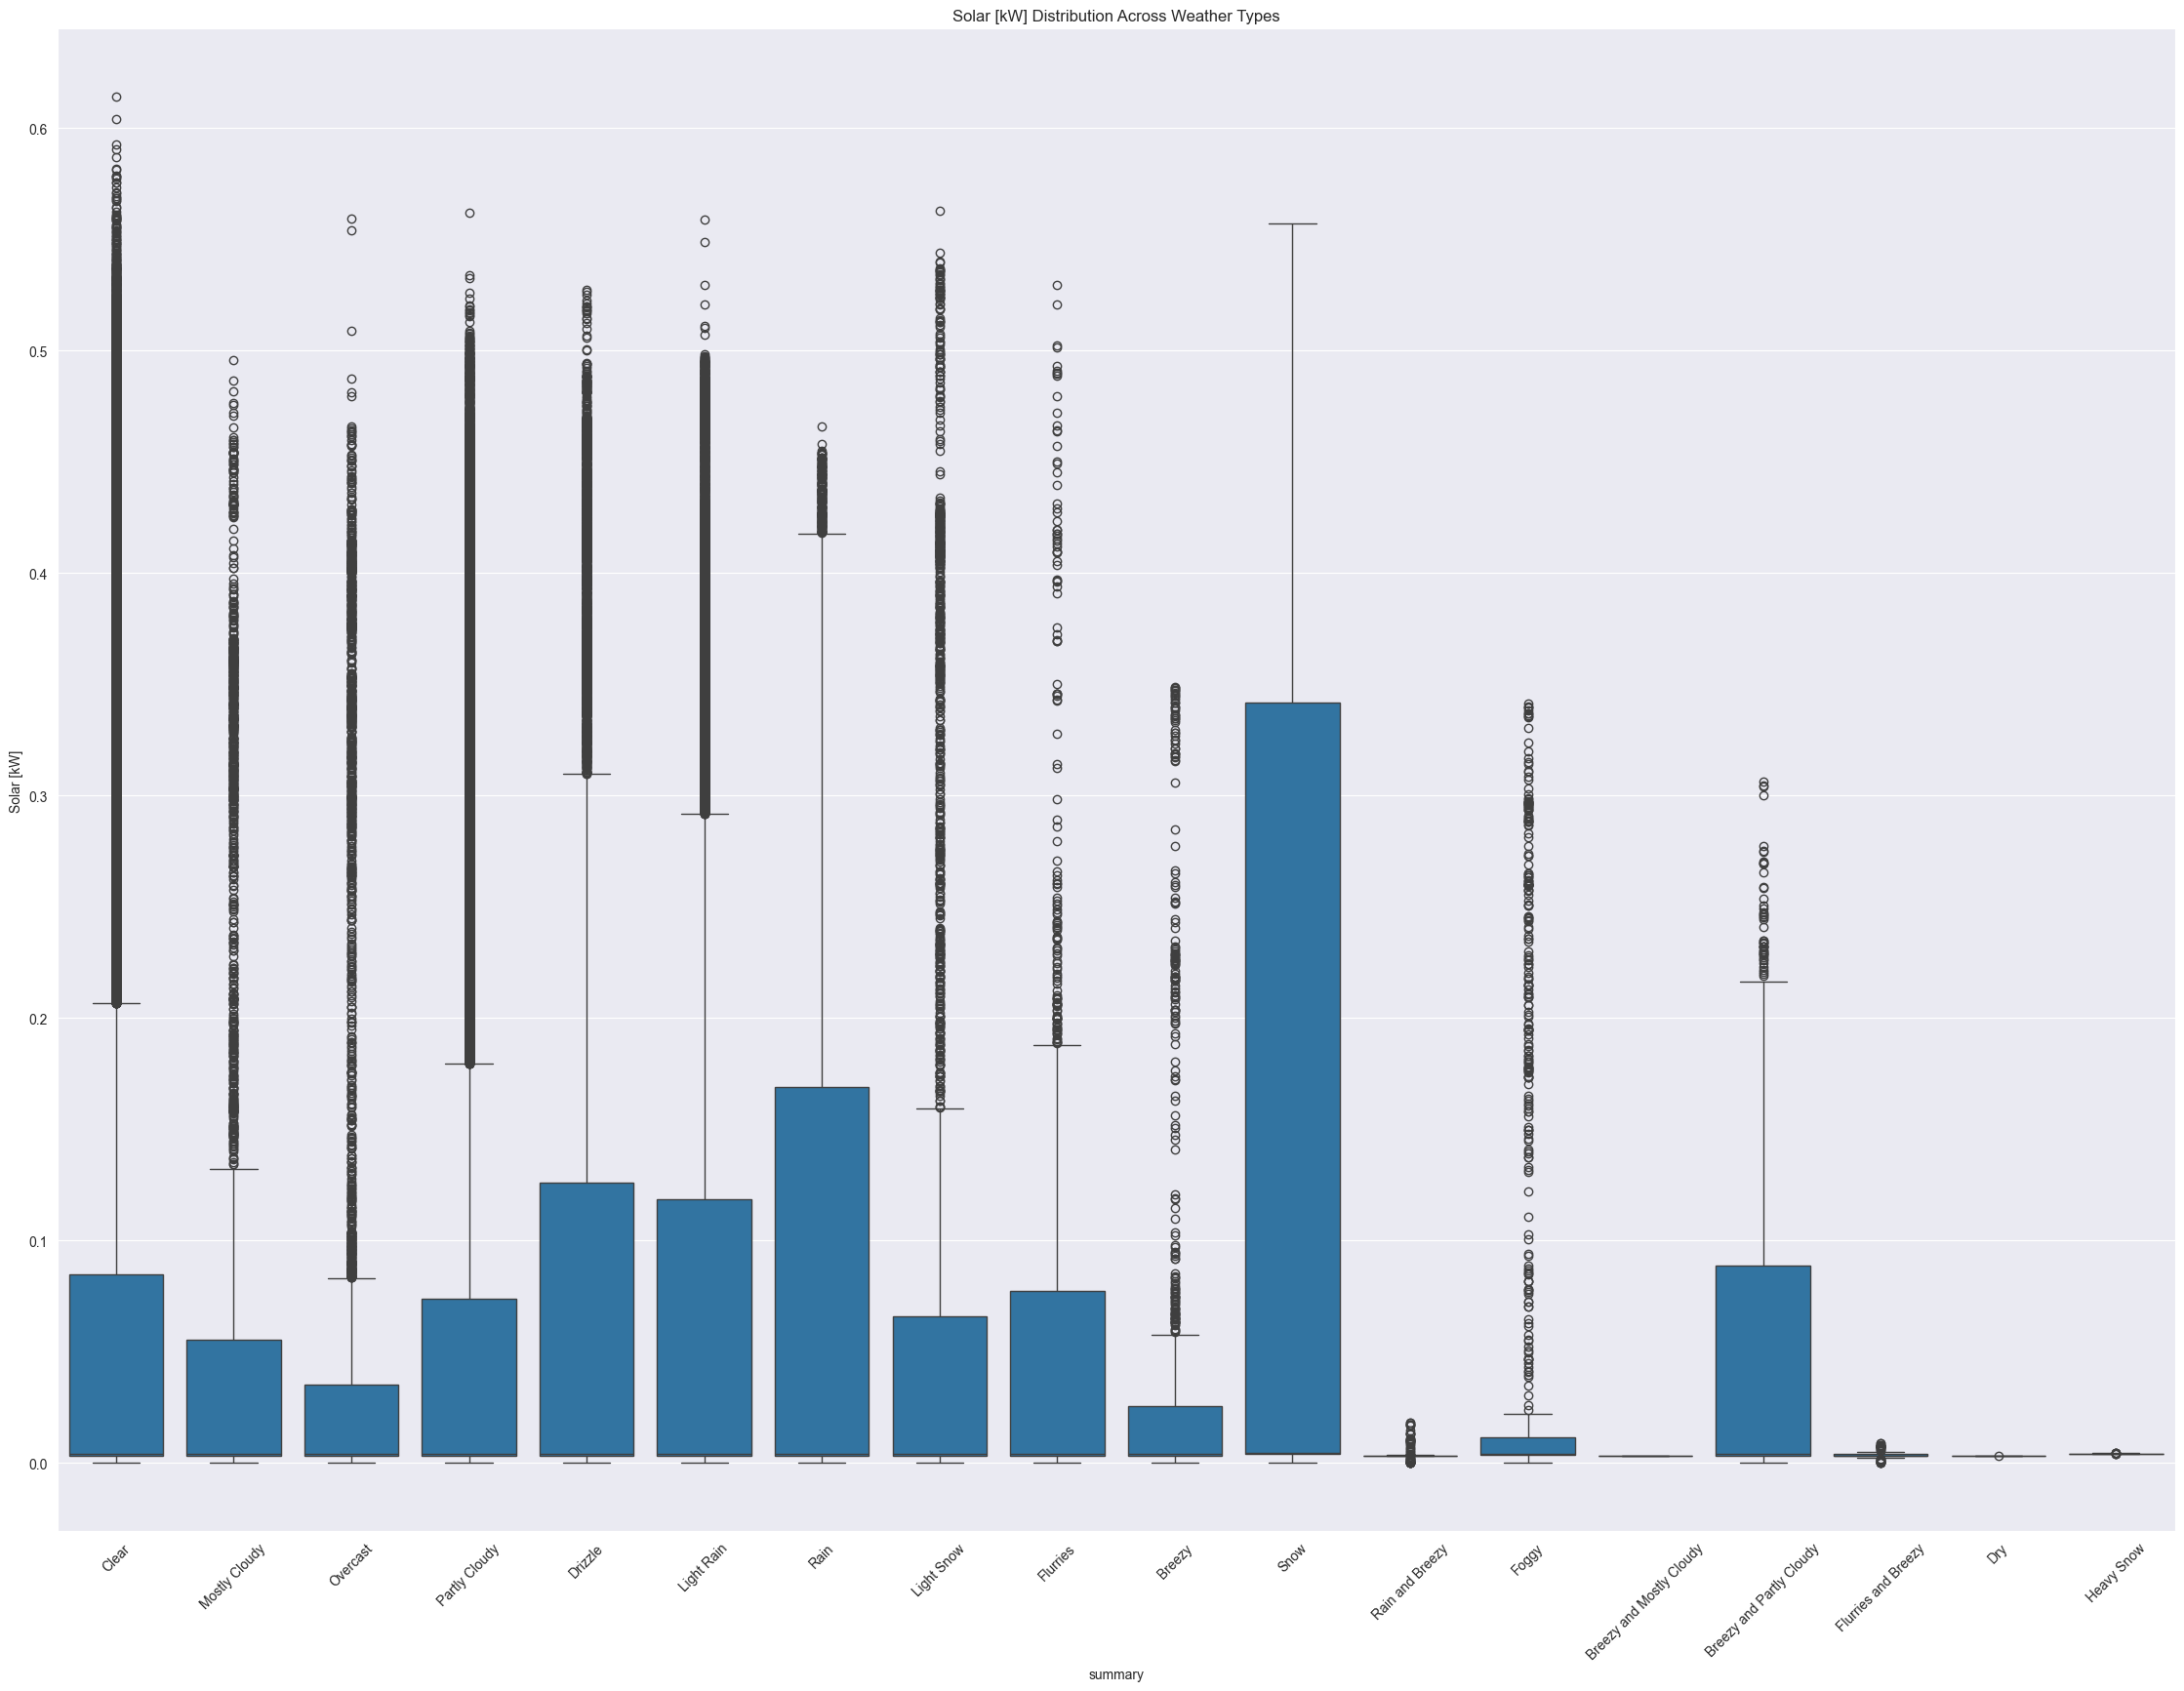

In [28]:
for feature in power_features_of_interest:
    plt.figure(figsize=(28, 20))
    sns.boxplot(x='summary', y=feature, data=data)
    plt.title(f'{feature} Distribution Across Weather Types')
    plt.xticks(rotation=45)  
    plt.show()

Information Gain method
Use data preprocessed before